### 1. Load Datasets
Loading test, train and validation sets into pandas dataframe

In [1]:
import pandas as pd

def read_data(train_path, test_path, val_path):
    """Reads train, test, and validation datasets from JSONL files.

    This function loads three separate line-delimited JSON files (JSONL) into 
    pandas DataFrames, typically used for splitting data into standard 
    machine learning subsets.

    Args:
        train_path (str): File path to the training dataset.
        test_path (str): File path to the testing dataset.
        val_path (str): File path to the validation dataset.

    Returns:
        tuple: A tuple containing three pandas DataFrames:
            - df_train (pd.DataFrame): The training data.
            - df_test (pd.DataFrame): The testing data.
            - df_validation (pd.DataFrame): The validation data.
    """
    df_train = pd.read_json(train_path, lines=True)
    df_test = pd.read_json(test_path, lines=True)
    df_validation = pd.read_json(val_path, lines=True)
    print("All datasets read successfully!")
    return df_train, df_test, df_validation

In [2]:
train_path, test_path, val_path = ('data/train.json', 'data/test.json', 'data/validation.json')
df_train, df_test, df_validation = read_data(train_path, test_path, val_path)

All datasets read successfully!


### 2. Exploratory Data Analysis (Sayeed, Jui)
#### Analyzing training dataset

In [ ]:
"""### 2. Exploratory Data Analysis (EDA)

This section inspects the training dataset to understand schema, data quality,
and entity distribution, informing subsequent preprocessing decisions.
""" 

In [2]:
df_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quality_checked  1112 non-null   object
 1   text             1112 non-null   str   
 2   task             1112 non-null   str   
 3   meta             1112 non-null   object
 4   doc_id           1112 non-null   str   
 5   dataset_type     1112 non-null   str   
 6   annotator_id     1112 non-null   str   
 7   entity_mentions  1112 non-null   object
dtypes: object(3), str(5)
memory usage: 69.6+ KB


Observed no null values

In [ ]:
"""### 2. Exploratory Data Analysis (EDA)

This cell previews the first few rows of the training dataset to quickly inspect
the schema, column names, and example values before deeper analysis.
"""

In [3]:
df_train.head()

,quality_checked,text,task,meta,doc_id,dataset_type,annotator_id,entity_mentions
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator2,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator8,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator11,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Observation: We do not need dataset_type because the test, train and validation files are already separate. We also do not need the columns quality_checked, annotator_id.

Dropping unrequired columns.

In [ ]:
"""### 2. Exploratory Data Analysis (EDA)

This cell drops unrequired columns from the training dataset
(dataset_type, quality_checked, annotator_id) to simplify
subsequent analysis and preprocessing.
"""

In [4]:
df_train.drop(columns=['quality_checked', 'dataset_type', 'annotator_id'])

,text,task,meta,doc_id,entity_mentions
0,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
...,...,...,...,...,...
1107,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Helmut Ludescher', 'articles': ...",001-60002,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1108,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'J. Peter', 'articles': [91, 34,...",001-146353,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1109,PROCEDURE\n\nThe case was referred to the Cour...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Christopher Ian Scott', 'articl...",001-58010,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1110,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henryk Kreuz', 'articles': [91,...",001-61921,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Analyzing task column

In [ ]:
"""### 2. Exploratory Data Analysis (EDA)

This cell inspects the unique values in the `task` column to assess whether
it carries useful information for preprocessing or can be removed.
"""

In [5]:
df_train['task'].unique()

<StringArray>
[       'Task: Annotate the document to anonymise the following person: Henrik Hasslund',
            'Task: Annotate the document to anonymise the following person: D. Stępniak',
         'Task: Annotate the document to anonymise the following person: Nusret Amutgan',
           'Task: Annotate the document to anonymise the following person: Mustafa Sarı',
      'Task: Annotate the document to anonymise the following person: Dariusz Karwowski',
         'Task: Annotate the document to anonymise the following person: İlhan Karakurt',
        'Task: Annotate the document to anonymise the following person: Artur Warsiński',
   'Task: Annotate the document to anonymise the following person: Włodzimierz Majewski',
         'Task: Annotate the document to anonymise the following person: İlhami Erseven',
            'Task: Annotate the document to anonymise the following person: Semir Güzel',
 ...
       'Task: Annotate the document to anonymise the following person: Zekeriya K

Observation: we don't need the task column

Finding out how many unique values are there in text column and doc_id column. Making sure they match.

In [ ]:
"""### 2. Exploratory Data Analysis (EDA)

This cell computes the number of unique document texts in the training set,
helping identify potential duplicate entries or repeated content.
"""
len(df_train['text'].unique())

1014

In [ ]:
"""### 2. Exploratory Data Analysis (EDA)

This cell computes the number of unique document IDs in the training set,
used to compare against unique texts to detect duplicates.
"""
len(df_train['doc_id'].unique())

1014

Observation: We have 1014 unique values for documents but the dataset has 1112 entries. So there might be duplicates.

In [ ]:
"""### Document Analysis Notes

This section inspects document-level metadata to understand duplication,
document identifiers, and dataset uniqueness before further preprocessing.
It helps verify data integrity and informs downstream anonymization steps.
"""

In [8]:
df_train['meta'][0]

{'applicant': 'Henrik Hasslund',
 'articles': [91, 34, 54, 34, 93],
 'countries': 'DNK',
 'legal_branch': 'CHAMBER',
 'year': 2008}

Observation: We may be able to reserve this column for later evaluation. Might be helpful to find out if our model struggles with region specific names, or has a bias, etc.

In [ ]:
"""### 2. Exploratory Data Analysis (EDA)

This cell creates a new DataFrame containing only the 'text', 'meta', and 'doc_id' columns from the training set.
This subset is useful for metadata analysis and can be exported for further evaluation or downstream tasks.
"""

In [9]:
df_train_meta = df_train[['text', 'meta', 'doc_id']].copy()
df_train_meta.head()

,text,meta,doc_id
0,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
1,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
2,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
3,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
4,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741


In [ ]:
"""### 2. Exploratory Data Analysis (EDA)

This cell exports the training set metadata (text, meta, doc_id) to a CSV file.
The exported file can be used for further analysis or model evaluation.
"""

In [11]:
df_train_meta.to_csv('data/metadata/train_meta.csv')

In [12]:
df_test_meta = df_test[['text', 'meta', 'doc_id']].copy()
df_test_meta.to_csv('data/metadata/test_meta.csv')

df_validation_meta = df_validation[['text', 'meta', 'doc_id']].copy()
df_validation_meta.to_csv('data/metadata/validation_meta.csv')

Exploring entity mentions column

In [ ]:
"""This cell inspects a sample entry from the 'entity_mentions' column in the training dataset.
It helps to understand the structure and content of entity annotations for a single document,
which is useful for designing preprocessing and extraction logic for NER tasks.
"""

In [13]:
df_train['entity_mentions'][1]

[{'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 62,
  'entity_id': '001-90194_a2_e1',
  'entity_mention_id': '001-90194_a2_em1',
  'entity_type': 'CODE',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': '36244/06',
  'start_offset': 54},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'correct',
  'end_offset': 94,
  'entity_id': '001-90194_a2_e2',
  'entity_mention_id': '001-90194_a2_em2',
  'entity_type': 'ORG',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Kingdom of Denmark',
  'start_offset': 76},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 242,
  'entity_id': '001-90194_a2_e3',
  'entity_mention_id': '001-90194_a2_em3',
  'entity_type': 'DEM',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Danish',
  'start_offset': 236},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 271,
  '

In [ ]:
"""This cell explodes the 'entity_mentions' column in the training dataset so that each entity mention becomes a separate row.
It then normalizes the nested entity information into flat columns and combines it with the corresponding 'doc_id'.
The resulting DataFrame, 'df_train_entities', provides a convenient structure for analyzing and processing individual entity annotations.
"""

In [14]:
import json
df_train_exploded = df_train.explode('entity_mentions')
entities_flat = pd.json_normalize(df_train_exploded['entity_mentions'])
df_train_entities = pd.concat([df_train_exploded[['doc_id']].reset_index(drop=True), entities_flat.reset_index(drop=True)], axis=1)

df_train_entities.head()

,doc_id,confidential_status,edit_type,end_offset,entity_id,entity_mention_id,entity_type,identifier_type,related_mentions,span_text,start_offset
0,001-90194,NOT_CONFIDENTIAL,check,62,001-90194_a1_e1,001-90194_a1_em1,CODE,DIRECT,None,36244/06,54
1,001-90194,NOT_CONFIDENTIAL,correct,94,001-90194_a1_e2,001-90194_a1_em2,ORG,NO_MASK,None,Kingdom of Denmark,76
2,001-90194,NOT_CONFIDENTIAL,check,242,001-90194_a1_e3,001-90194_a1_em3,DEM,NO_MASK,None,Danish,236
3,001-90194,NOT_CONFIDENTIAL,check,271,001-90194_a1_e4,001-90194_a1_em4,PERSON,DIRECT,None,Mr Henrik Hasslund,253
4,001-90194,NOT_CONFIDENTIAL,check,308,001-90194_a1_e5,001-90194_a1_em5,DATETIME,QUASI,None,31 August 2006,294


Observation: We have start_offset, end_offset and entity_type. We need to extract this data to create a token and tags for finetuning DistilliBERT model.

Checking the counts of entities for filtered set where identifier_type is not NO_MASK

In [ ]:
"""### 2. Exploratory Data Analysis (EDA)

This cell visualizes the distribution of entity types in the training dataset,
excluding entities with identifier_type 'NO_MASK'. It helps identify class imbalance
among entity types, which is important for model training and evaluation.
"""

Entity Type Counts:


<Axes: title={'center': 'Distribution of Entity Types'}, xlabel='entity_type'>

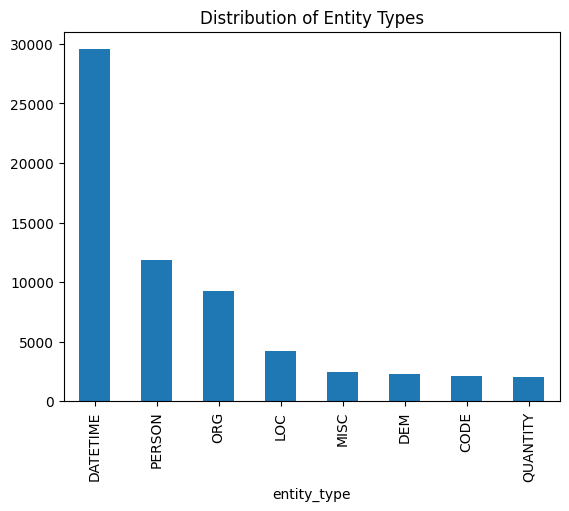

In [15]:
print("Entity Type Counts:")
entity_type_stats = df_train_entities[df_train_entities['identifier_type'] != 'NO_MASK']['entity_type'].value_counts()
entity_type_stats.plot(kind='bar', title='Distribution of Entity Types')

Certain imbalance of data is seen here where datetime entities are much higher in count than quantity or code

In [ ]:
"""This cell visualizes the distribution of masking requirements in the training dataset.
It plots the counts of each identifier_type in the 'entity_mentions' column, helping to understand
how many entities require masking versus those that do not. This informs the anonymization strategy
and highlights the prevalence of sensitive information in the dataset.
"""

<Axes: title={'center': 'Distribution of Masking Needs'}, xlabel='identifier_type'>

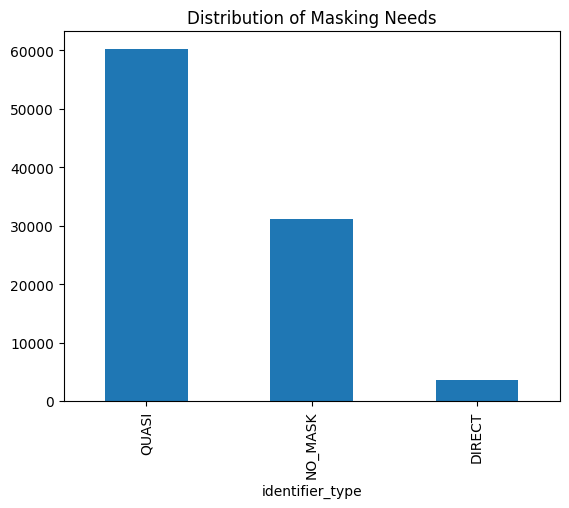

In [16]:
# Check masking requirements
mask_stats = df_train_entities['identifier_type'].value_counts()
mask_stats.plot(kind='bar', title='Distribution of Masking Needs')

In [ ]:
"""This cell analyzes the distribution of entities per document in the training dataset.
It groups entity annotations by document ID, counts the number of entities in each document,
and visualizes the distribution using a histogram. This helps assess annotation density and
potential class imbalance across documents for NER model training."""

<Axes: title={'center': 'Entities per Document Distribution'}, xlabel='Number of Entities', ylabel='Number of Documents'>

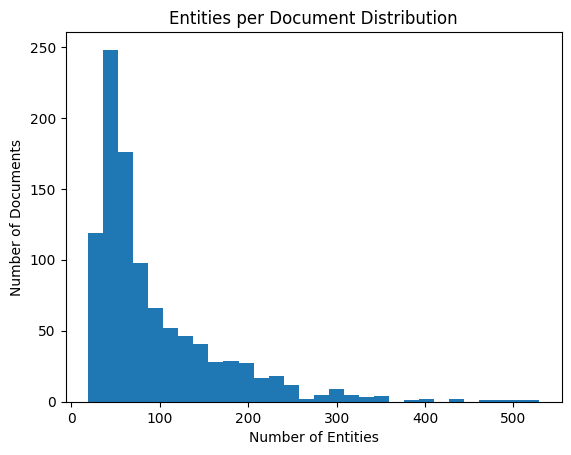

In [17]:
entities_per_doc = df_train_entities.groupby('doc_id').size().sort_values(ascending=False)
entities_per_doc.plot(kind='hist', bins=30, title='Entities per Document Distribution', xlabel='Number of Entities', ylabel='Number of Documents')

In [18]:
print(f"Average entities per document: {entities_per_doc.mean():.2f}")

Average entities per document: 93.72


### 3. Data pre-processing (Jui)
Converting offests to list

In [3]:
def convert_offsets_to_lists(row):
    """Converts character-level entity offsets into token-level BIO tags.

    This function is designed to be used with the Hugging Face `Dataset.map()` 
    method. It processes a single dataset example containing raw text and 
    character-offset entity mentions, aligning them to a whitespace-tokenized 
    format suitable for NER model training.

    The function creates an intermediate character-level map to handle alignment 
    and filters out entities marked as 'NO_MASK'.

    Args:
        row (dict): A single example from a Hugging Face Dataset. Must contain:
            - 'text' (str): The raw input text.
            - 'entity_mentions' (list[dict]): A list of dictionaries where each
              contains:
                - 'start_offset' (int): Starting character index.
                - 'end_offset' (int): Ending character index (exclusive).
                - 'entity_type' (str): The entity label (e.g., "PER").
                - 'identifier_type' (str, optional): ignored if 'NO_MASK'.

    Returns:
        dict: A dictionary containing the new features to be added to the dataset:
            - 'tokens' (list[str]): The text split by whitespace.
            - 'ner_tags' (list[str]): The corresponding BIO tags for each token 
              (e.g., ["O", "B-PER", "I-PER", "O"]).
    """
    text = row['text']
    entities = row['entity_mentions']

    # create character-level map
    char_tags = ["O"] * len(text)

    for ent in entities:
        # Filter 'NO_MASK' entities
        if ent.get('identifier_type') == 'NO_MASK':
            continue

        start, end = ent['start_offset'], ent['end_offset']
        label = ent['entity_type']

        # fill character-level map
        if start < len(text) and end <= len(text):
            char_tags[start] = f"B-{label}" # beginning of entity
            for i in range(start+1, end):
                char_tags[i] = f"I-{label}" # inside entity

    # convert character map to word - tag
    tokens = text.split()
    ner_tags = []

    cursor = 0
    for token in tokens:
        # advance cursor to the start of word (skipping spaces)
        while cursor < len(text) and text[cursor].isspace():
            cursor += 1

        # tag of the word is the tag of its first character
        if cursor < len(text):
            ner_tags.append(char_tags[cursor])
            cursor += len(token)
        else:
            ner_tags.append("O")

    return {"tokens": tokens, "ner_tags": ner_tags}

Create label mappings from train set to be used to pass when training the model, same mappings would be used during tokenization of test and validation sets as well

In [4]:
from datasets import Dataset

def create_mappings(df_train):
    """Generates label-to-ID mappings for NER training from a pandas DataFrame.

    This function converts a raw pandas DataFrame containing text and offsets into a 
    Hugging Face Dataset, processes it to extract token-level tags, and identifies 
    all unique NER labels present in the data. It then creates the necessary 
    dictionaries to map these labels to integers and back.

    Args:
        df_train (pd.DataFrame): The training data containing at least 'text' 
            and 'entity_mentions' columns.

    Returns:
        tuple: A tuple containing two dictionaries:
            - label2id (dict): Mapping of label strings to integer IDs 
              (e.g., {'B-PER': 0, 'O': 1}).
            - id2label (dict): Mapping of integer IDs to label strings 
              (e.g., {0: 'B-PER', 1: 'O'}).
            - label_list (list[str]): A sorted list of all unique label strings 
              found in the training set (e.g., ['B-LOC', 'B-PER', ...]).
    """
    # converting Pandas to Hugging Face Dataset
    hf_train = Dataset.from_pandas(df_train)
    train_processed = hf_train.map(convert_offsets_to_lists)

    print("Dataset converted to token-tag pairs.")
    print(train_processed[0]['tokens'])
    print(train_processed[0]['ner_tags'])

    # extracting unique tags from training data
    unique_tags = set(tag for row in train_processed for tag in row['ner_tags'])
    label_list = sorted(list(unique_tags)) # e.g., ['B-LOC', 'B-PER', 'I-PER', 'O']

    # createing maps
    label2id = {label: i for i, label in enumerate(label_list)}
    id2label = {i: label for i, label in enumerate(label_list)}

    print(f"Number of labels: {len(label_list)}")
    print(label2id)

    return label2id, id2label, label_list

label2id, id2label, label_list = create_mappings(df_train)

/opt/anaconda3/envs/hf-venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 1112/1112 [00:03<00:00, 293.91 examples/s]


Dataset converted to token-tag pairs.
['PROCEDURE', 'The', 'case', 'originated', 'in', 'an', 'application', '(no.', '36244/06)', 'against', 'the', 'Kingdom', 'of', 'Denmark', 'lodged', 'with', 'the', 'Court', 'under', 'Article', '34', 'of', 'the', 'Convention', 'for', 'the', 'Protection', 'of', 'Human', 'Rights', 'and', 'Fundamental', 'Freedoms', '(“the', 'Convention”)', 'by', 'a', 'Danish', 'national,', 'Mr', 'Henrik', 'Hasslund', '(“the', 'applicant”),', 'on', '31', 'August', '2006.', 'The', 'applicant', 'was', 'represented', 'by', 'Mr', 'Tyge', 'Trier,', 'a', 'lawyer', 'practising', 'in', 'Copenhagen.', 'The', 'Danish', 'Government', '(“the', 'Government”)', 'were', 'represented', 'by', 'their', 'Agent,', 'Ms', 'Nina', 'Holst-Christensen', 'of', 'the', 'Ministry', 'of', 'Justice.', 'On', '5', 'September', '2007', 'the', 'Acting', 'President', 'of', 'the', 'Fifth', 'Section', 'decided', 'to', 'give', 'notice', 'of', 'the', 'application', 'to', 'the', 'Government.', 'It', 'was', 'also

In [4]:
# extracting unique tags from training data
unique_tags = set(tag for row in train_processed for tag in row['ner_tags'])
label_list = sorted(list(unique_tags)) # e.g., ['B-LOC', 'B-PER', 'I-PER', 'O']

# createing maps
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}

print(f"Number of labels: {len(label_list)}")
print(label2id)

Number of labels: 17
{'B-CODE': 0, 'B-DATETIME': 1, 'B-DEM': 2, 'B-LOC': 3, 'B-MISC': 4, 'B-ORG': 5, 'B-PERSON': 6, 'B-QUANTITY': 7, 'I-CODE': 8, 'I-DATETIME': 9, 'I-DEM': 10, 'I-LOC': 11, 'I-MISC': 12, 'I-ORG': 13, 'I-PERSON': 14, 'I-QUANTITY': 15, 'O': 16}


Using AutoTokenizer to handle sub-words and align new tags. Defining tokenization function to be used various versions of BERT

In [5]:
def tokenize_and_align(examples, tokenizer, label2id):
  """Tokenizes inputs and aligns NER tags with sub-word tokens.

    This function processes a batch of pre-tokenized text (lists of words) and 
    corresponding NER tags. It uses the tokenizer to split words into sub-words 
    and aligns the original labels to these new tokens. 

    Key behaviors:
    1. Special tokens ([CLS], [SEP]) are assigned the label -100 (ignored by loss).
    2. The first sub-word of a word gets the original label ID.
    3. Subsequent sub-words of the same word (e.g., "##ing") are assigned -100.

    Args:
        examples (dict): A batch from a Hugging Face Dataset containing:
            - 'tokens' (list[list[str]]): Batch of sentences split into words.
            - 'ner_tags' (list[list[str]]): Batch of corresponding BIO tags.
        tokenizer (PreTrainedTokenizerFast): A Hugging Face "fast" tokenizer 
            that supports the `.word_ids()` method.
        label2id (dict): A dictionary mapping label strings (e.g., "B-PER") 
            to integer IDs.

    Returns:
        BatchEncoding: The tokenizer output containing 'input_ids', 'attention_mask', 
        and a new 'labels' key aligned with the tokenized sequence.
    """
  # split words into sub-words
  tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

  labels = []
  for i, label in enumerate(examples["ner_tags"]):
      word_ids = tokenized_inputs.word_ids(batch_index=i) #supported only for fast tokenizers
      previous_word_idx = None
      label_ids = []
      for word_idx in word_ids:
          if word_idx is None:
              # special tokens like [CLS] get -100 (ignored)
              label_ids.append(-100)
          elif word_idx != previous_word_idx:
              # first piece of a word gets the real label ID
              label_ids.append(label2id[label[word_idx]]) #using map created from training set
          else:
              # subsequent pieces (e.g., "##lor") get -100 (ignored)
              label_ids.append(-100)
          previous_word_idx = word_idx
      labels.append(label_ids)

  tokenized_inputs["labels"] = labels
  return tokenized_inputs

Writing a script for processing test and validation sets

In [6]:
def preprocess_data(df, tokenizer, label2id):
  """Converts a raw pandas DataFrame into a tokenized Hugging Face Dataset for BERT.

    This is a pipeline function that orchestrates the entire preprocessing workflow. 
    It performs the following steps:
    1. Converts the pandas DataFrame to a Hugging Face Dataset.
    2. Maps character-level entity offsets to token-level BIO tags.
    3. Tokenizes the text and aligns the BIO tags with the resulting sub-word tokens
       using the provided label-to-ID mapping.

    Args:
        df (pd.DataFrame): The input dataframe containing 'text' and 'entity_mentions'.
        tokenizer (PreTrainedTokenizerFast): The tokenizer to process the text.
        label2id (dict): The mapping of label strings (e.g., 'B-PER') to integer IDs
            used for alignment during tokenization.

    Returns:
        Dataset: A processed Hugging Face Dataset containing features like 'input_ids', 
        'attention_mask', and 'labels', ready for training or evaluation.
    """
  # converting Pandas to Hugging Face Dataset
  hf = Dataset.from_pandas(df)
  processed = hf.map(convert_offsets_to_lists)
  #tokenize
  tokenized = processed.map(tokenize_and_align, batched=True, fn_kwargs={"tokenizer": tokenizer, "label2id": label2id})

  return tokenized

Importing AutoTokenizer to use various BERT tokenizers

In [7]:
from transformers import AutoTokenizer

## 4. Bi-LSTM (Jui)

Using DistilBERT tokenizer to keep the comparison fair

In [8]:
tokenizer_distilbert = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [10]:
train_distilbert = preprocess_data(df_train ,tokenizer_distilbert, label2id)

Map: 100%|██████████| 1112/1112 [00:09<00:00, 116.01 examples/s]


In [11]:
test_distilbert = preprocess_data(df_test, tokenizer_distilbert, label2id)
validation_distilbert = preprocess_data(df_validation, tokenizer_distilbert, label2id)

Map: 100%|██████████| 541/541 [00:02<00:00, 222.91 examples/s]


Importing pyTorch

In [12]:
import torch
import torch.nn as nn

In [13]:
def device_setup():
    """Configures and returns the optimal PyTorch device for training.

    This function automatically detects the available hardware accelerator.
    It prioritizes Apple Silicon (MPS) and NVIDIA GPUs (CUDA) over the CPU.

    Returns:
        torch.device: The device object ('mps', 'cuda', or 'cpu') to be used 
        for tensor computations.
    """
    #setup GPU availability
    if torch.backends.mps.is_available():
        device = torch.device('mps') #mac m4 pro chip integrated gpu
        print(f"MPS device found: {device}")
    elif torch.cuda.is_available():
        device = torch.device('cuda')
        print(f"GPU device found: {device}")
    else:
        device = torch.device('cpu')
        print(f"No GPU device found. Falling back to {device}")
    
    return device

In [14]:
device = device_setup()

MPS device found: mps


Function to seet all seed values so as to produce deterministic results at every run

In [25]:
import random
import os
import numpy as np
import torch

def set_all_seed(device, seed_value = 42):
    """Sets random seeds for Python, NumPy, and PyTorch to ensure reproducibility.

    This function fixes the seed for the native Python `random` module, `numpy`, 
    and `torch` (both CPU and GPU). It also configures cuDNN to use deterministic 
    algorithms when using CUDA, which may slow down training slightly but ensures 
    consistent results across runs.

    Args:
        device (torch.device): The active computing device (e.g., 'cpu', 'cuda', 
            or 'mps'). Used to determine which specific GPU backend to seed.
        seed_value (int, optional): The seed number to use. Defaults to 42.
    
    Returns:
        None: Prints a confirmation message upon completion.
    """
    # python seed
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)

    # numpy seed
    np.random.seed(seed_value)

    # pytorch seed for CPU
    torch.manual_seed(seed_value)

    # seed for GPU (CUDA)
    if device == torch.device('cuda'):
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)  # for multi-GPU setups

        # configuring PyTorch to be deterministic (makes it slightly slower but reproducible)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # seed for MPS (Apple Silicon GPU)
    if device == torch.device('mps'):
        torch.mps.manual_seed(seed_value)
    
    print(f"All seeds successfully set to {seed_value}.")

In [26]:
set_all_seed(device, seed_value = 42)

All seeds successfully set to 42.


Defining the Bi-LSTM model for NER

In [15]:
class bilstm_nre(nn.Module):
  """A Bidirectional LSTM model for Named Entity Recognition (NER).

    This model consists of a custom embedding layer, a bidirectional LSTM layer for 
    sequence encoding, and a linear classifier for token-level tag prediction. 
    It supports optional dropout regularization and class-weighted loss calculation.

    Args:
        vocab_size (int): The size of the vocabulary (number of unique tokens).
        num_labels (int): The number of unique output tags (BIO labels).
        embed_dim (int, optional): The size of the embedding vectors. Defaults to 128.
        hidden_dim (int, optional): The number of features in the LSTM hidden state. 
            Defaults to 256.
        weight_tensor (torch.Tensor, optional): A tensor of class weights to handle 
            imbalanced data in CrossEntropyLoss.
        dropout_rate (float, optional): The probability of zeroing out elements in 
            the dropout layer. If None, no dropout is applied.

    Attributes:
        embedding (nn.Embedding): The learnable embedding layer (padding_idx=0).
        lstm (nn.LSTM): The bidirectional LSTM layer.
        dropout (nn.Dropout, optional): The dropout layer (if dropout_rate is provided).
        classifier (nn.Linear): The final dense layer projecting LSTM outputs to labels.
        loss_fct (nn.CrossEntropyLoss): The loss function, configured to ignore 
            padding index -100.
  """
  def __init__(self, vocab_size, num_labels, embed_dim=128, hidden_dim=256, weight_tensor=None, dropout_rate=None):
      super().__init__()

      #setting up a custom embedding layer
      #seting padding index to 0 the embedding model from learning vectors for padding
      self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)

      #bi-lstm layer
      self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)

      #dropout
      if dropout_rate is not None:
        self.dropout = nn.Dropout(dropout_rate)

      #output layer (2*hidden_dim for bi-lstm)
      self.classifier = nn.Linear(hidden_dim * 2, num_labels)

      #set loss function (ignore_index=-100 because we set masking to -100 in previous function)
      if weight_tensor is not None:
        self.loss_fct = nn.CrossEntropyLoss(ignore_index=-100, weight=weight_tensor)
      else:
        self.loss_fct = nn.CrossEntropyLoss(ignore_index=-100)

  #forward pass
  def forward(self, input_ids, labels=None):
      """Performs a forward pass through the network.

        This method processes the input sequence through the embedding layer 
        and the LSTM, then projects the output to the label space. If labels 
        are provided, it also computes the Cross Entropy loss.

        Args:
            input_ids (torch.Tensor): A tensor of shape (batch_size, sequence_length) 
                containing the integer IDs of the input tokens.
            labels (torch.Tensor, optional): A tensor of shape (batch_size, sequence_length) 
                containing the correct tag IDs for training. Defaults to None.

        Returns:
            tuple:
                - loss (torch.Tensor, optional): The computed loss value (scalar). 
                  Returns None if `labels` is not provided.
                - logits (torch.Tensor): The raw output scores from the classifier 
                  with shape (batch_size, sequence_length, num_labels).
      """
      #embed
      embeds = self.embedding(input_ids)

      #lstm forward
      lstm_out, _ = self.lstm(embeds)

      logits = self.classifier(lstm_out)

      #loss calculation
      loss = None
      if labels is not None:
          # Flatten the tensors so we can check every token at once
          # logits shape: (batch * seq_len, num_labels)
          # labels shape: (batch * seq_len)
          loss = self.loss_fct(logits.view(-1, logits.shape[-1]), labels.view(-1))

      return loss, logits

batch pre-processing function to prepare dataloaders

In [16]:
def collate_fn(batch):
    """Prepares a batch of samples for model training by padding sequences.

    This function is passed to the DataLoader to process a list of dataset items 
    into a single batch of tensors. It handles variable-length sequences by 
    padding them to the length of the longest sequence in the batch.

    Key behaviors:
    1.  Pads `input_ids` with 0 (standard padding token).
    2.  Pads `labels` with -100 (index ignored by PyTorch Loss functions).
    3.  Moves the resulting tensors to the configured computing device (CPU/GPU).

    Args:
        batch (list[dict]): A list of dataset examples, where each example is a 
            dictionary containing 'input_ids' and 'labels' (lists of integers).

    Returns:
        tuple: A tuple containing two tensors:
            - input_ids (torch.Tensor): Padded input sequences of shape 
              (batch_size, max_seq_len).
            - labels (torch.Tensor): Padded label sequences of shape 
              (batch_size, max_seq_len).
    """
    # convert batch to tensors
    input_ids = [torch.tensor(item['input_ids']) for item in batch]
    labels = [torch.tensor(item['labels']) for item in batch]

    # padding inputs with 0(blank space), labels with -100
    input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True, padding_value=0)
    labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value=-100)

    return input_ids.to(device), labels.to(device)

In [17]:
from torch.utils.data import DataLoader

def setup_dataloaders(train, test, validation, batch_size=16, shuffle=True, collate_fn=collate_fn):
    """Creates PyTorch DataLoaders for training, testing, and validation sets.

    This function wraps the provided datasets into DataLoader objects, enabling 
    batch processing, shuffling, and custom collation (padding) during the 
    training loop.

    Args:
        train (Dataset): The training dataset.
        test (Dataset): The testing dataset.
        validation (Dataset): The validation dataset.
        batch_size (int, optional): The number of samples per batch. Defaults to 16.
        shuffle (bool, optional): Whether to shuffle the data at every epoch. 
            Defaults to True.
        collate_fn (callable, optional): The function used to merge a list of 
            samples into a mini-batch. Defaults to the global `collate_fn`.

    Returns:
        tuple: A tuple containing three `torch.utils.data.DataLoader` objects:
            - train_loader (DataLoader): Iterator for the training set.
            - test_loader (DataLoader): Iterator for the testing set.
            - validation_loader (DataLoader): Iterator for the validation set.
    """
    train_loader = DataLoader(train, batch_size=16, shuffle=True, collate_fn=collate_fn)
    test_loader = DataLoader(test, batch_size=16, shuffle=True, collate_fn=collate_fn)
    validation_loader = DataLoader(validation, batch_size=16, shuffle=True, collate_fn=collate_fn)

    return train_loader, test_loader, validation_loader

In [18]:
train_loader, test_loader, validation_loader = setup_dataloaders(train_distilbert, test_distilbert, validation_distilbert)

Tracking model performance at every epoch

In [ ]:
#using huggingface evaluate library for NER evaluation
# !pip install evaluate seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/43.6 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.9 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=b7cf57ae908c0f9adff6cf5bb8ddb236c47ede6d12addf74a96d8bde2727a287
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [19]:
import matplotlib.pyplot as plt
import evaluate
import numpy as np

Function to evaluate after every epoch

In [20]:
seqeval = evaluate.load("seqeval")

def evaluate_epoch(model, dataloader, label_list):
    """Evaluates the model on a dataset using strict entity-level metrics.

    This function iterates through the provided dataloader, computes the loss, 
    and decodes the raw integer predictions back into BIO tags. It utilizes 
    the `seqeval` library to calculate standard NER metrics (Precision, Recall, 
    F1), ensuring that entities are evaluated as whole units (e.g., "New York") 
    rather than just individual tokens.

    Key behaviors:
    1.  Sets the model to evaluation mode (`model.eval()`).
    2.  Ignores padding tokens (ID -100) during metric calculation.
    3.  Aggregates the loss across all batches.

    Args:
        model (nn.Module): The trained PyTorch model.
        dataloader (DataLoader): Iterator for the validation or test dataset.
        label_list (list[str]): A list of label strings (e.g., ["O", "B-PER"]) 
            indexed by their integer IDs, used for decoding predictions.

    Returns:
        dict: A dictionary containing the computed performance metrics:
            - 'val_loss' (float): The average Cross Entropy loss per batch.
            - 'accuracy' (float): Token-level accuracy.
            - 'precision' (float): Strict entity-level precision.
            - 'recall' (float): Strict entity-level recall.
            - 'f1' (float): Strict entity-level F1 score.
    """
    model.eval() # Set to evaluation mode

    all_preds = []
    all_labels = []
    total_val_loss = 0

    with torch.no_grad():
        for batch_ids, batch_labels in dataloader:
            batch_ids = batch_ids.to(device)
            batch_labels = batch_labels.to(device)

            # Forward pass
            loss, logits = model(batch_ids, batch_labels)

            # test loss
            total_val_loss += loss.item()

            # Get predictions (argmax)
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            labels = batch_labels.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    #calculate validation loss
    avg_val_loss = total_val_loss / len(dataloader)

    # convert IDs back to Tags (removing -100)
    decoded_preds = [
        [label_list[p] for (p, l) in zip(pred, label) if l != -100]
        for pred, label in zip(all_preds, all_labels)
    ]
    decoded_labels = [
        [label_list[l] for (p, l) in zip(pred, label) if l != -100]
        for pred, label in zip(all_preds, all_labels)
    ]

    # compute metrics using seqeval (Strict Entity-Level scoring)
    results = seqeval.compute(predictions=decoded_preds, references=decoded_labels)

    return {
        "val_loss": avg_val_loss,
        "accuracy": results["overall_accuracy"],
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"]
    }

Function for training loop with evaluation metric after each epoch

In [21]:
def train_eval_lstm(model, optimizer, n_epoches = 5, early_stopping=False):
  """Trains and evaluates the Bi-LSTM model over multiple epochs.

    This function executes the main training loop. For each epoch, it performs 
    forward and backward passes on the training set (using the global `train_loader`), 
    updates model weights, and then evaluates performance on the validation set 
    (using the global `validation_loader`).

    It tracks key metrics (Loss, Accuracy, Precision, Recall, F1) across all epochs 
    and optionally implements an early stopping mechanism based on validation loss 
    to prevent overfitting.

    Args:
        model (nn.Module): The Bi-LSTM model to be trained.
        optimizer (torch.optim.Optimizer): The optimizer (e.g., AdamW) for 
            updating model parameters.
        n_epoches (int, optional): The maximum number of training epochs. 
            Defaults to 5.
        early_stopping (bool, optional): If True, training will stop early if 
            validation loss fails to improve for 3 consecutive epochs. 
            Defaults to False.

    Returns:
        dict: A history dictionary containing lists of recorded metrics for 
        plotting:
            - "train_loss": List of average training losses per epoch.
            - "val_loss": List of average validation losses per epoch.
            - "accuracy": List of validation accuracy scores.
            - "precision": List of validation precision scores.
            - "recall": List of validation recall scores.
            - "f1": List of validation F1 scores.
    """
  print("Starting Bi-LSTM for NER training...")

  history = {
      "train_loss": [],
      "val_loss": [],
      "accuracy": [],
      "precision": [],
      "recall": [],
      "f1": []
  }

  patience = 3
  patience_counter = 0
  best_val_loss = np.inf #initializing to infinite so that the first loss is always an improvement

  for epoch in range(n_epoches):
      # train
      model.train()
      total_loss = 0

      for batch_ids, batch_labels in train_loader:
          optimizer.zero_grad()
          loss, logits = model(batch_ids, batch_labels)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_train_loss = total_loss / len(train_loader)

      # validation on test set to calculate metrics
      metrics = evaluate_epoch(model, validation_loader, label_list)

      # tracking history of metrics
      history["train_loss"].append(avg_train_loss)
      history["val_loss"].append(metrics["val_loss"])
      history["accuracy"].append(metrics["accuracy"])
      history["precision"].append(metrics["precision"])
      history["recall"].append(metrics["recall"])
      history["f1"].append(metrics["f1"])

      print(f"Epoch {epoch+1}/{n_epoches} | "
            f"Train Loss: {avg_train_loss:.4f} | "
            f"Val Loss: {metrics['val_loss']:.4f} | "
            f"Val Recall: {metrics['recall']:.4f} | "
            f"Val Precision: {metrics['precision']:.4f} |"
            f"Val F1: {metrics['f1']:.4f} |"
            f"Val Accuracy: {metrics['accuracy']:.4f}")
      
      #early stopping
      if early_stopping == True:
        epoch_val_loss = metrics["val_loss"]
        if epoch_val_loss < best_val_loss:
            # if validation loss is improving/decreasing
            print(f"Validation Loss improved from {best_val_loss:.4f} to {epoch_val_loss:.4f}.")
            best_val_loss = epoch_val_loss
            patience_counter = 0  # reset the counter
            
        else:
            # validation loss increasing
            patience_counter += 1
            print(f"No improvement in validation loss. Patience: {patience_counter}")
            
            if patience_counter >= patience:
                print("Early Stopping triggered! Training stopped.")
                break # early stop


  print("Training complete!")
  return history

function for plotting the evaluation metrics vs epoch

In [22]:
def plot_training_metrics(history):
    """Visualizes the training process by plotting loss and classification metrics.

    This function creates a matplotlib figure with two side-by-side subplots:
    1.  **Loss Curves:** Compares Training Loss vs. Validation Loss to identify 
        overfitting or underfitting.
    2.  **Performance Metrics:** Tracks Validation Precision, Recall, Accuracy, 
        and F1 Score to evaluate the model's classification quality over time.

    Args:
        history (dict): A dictionary containing lists of metric values recorded 
            during training. Must contain the following keys:
            - 'train_loss', 'val_loss'
            - 'recall', 'precision', 'f1', 'accuracy'

    Returns:
        None: Displays the plot using `plt.show()`.
    """
    epochs_range = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(18, 6))

    # training vs validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history['train_loss'], 'r-o', label='Training Loss')
    plt.plot(epochs_range, history['val_loss'], 'b-o', label='Validation Loss')
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # R vs P vs A vs F1
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history['recall'], 'b-o', label='Val Recall')
    plt.plot(epochs_range, history['f1'], 'g-o', label='Val F1 Score')
    plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')
    plt.plot(epochs_range, history['precision'], 'r-o', label='Precision')
    plt.title('Validation R vs P vs A vs F1')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.ylim(0, 1.0) # y-axis to 0-100%
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Training & Evaluation LSTM model v1

In [53]:
# vocab_size is 30522 for DistilBERT
# num_labels is len(label_list)
lstm_nre_v1 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=256).to(device)
optimizer_v1 = torch.optim.Adam(lstm_nre_v1.parameters(), lr=1e-4)

In [54]:
history_v1 = train_eval_lstm(lstm_nre_v1, optimizer_v1, n_epoches = 10)

Starting Bi-LSTM for NER training...


/opt/anaconda3/envs/hf-venv/lib/python3.11/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/hf-venv/lib/python3.11/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10 | Train Loss: 1.8969 | Val Loss: 0.6523 | Val Recall: 0.0000 | Val Precision: 0.0000 |Val F1: 0.0000 |Val Accuracy: 0.8740
Epoch 2/10 | Train Loss: 0.6376 | Val Loss: 0.5592 | Val Recall: 0.0000 | Val Precision: 0.0000 |Val F1: 0.0000 |Val Accuracy: 0.8740
Epoch 3/10 | Train Loss: 0.5484 | Val Loss: 0.4729 | Val Recall: 0.0052 | Val Precision: 0.0844 |Val F1: 0.0099 |Val Accuracy: 0.8783
Epoch 4/10 | Train Loss: 0.4554 | Val Loss: 0.3934 | Val Recall: 0.0917 | Val Precision: 0.2688 |Val F1: 0.1368 |Val Accuracy: 0.9011
Epoch 5/10 | Train Loss: 0.3797 | Val Loss: 0.3420 | Val Recall: 0.2318 | Val Precision: 0.5630 |Val F1: 0.3283 |Val Accuracy: 0.9207
Epoch 6/10 | Train Loss: 0.3275 | Val Loss: 0.3027 | Val Recall: 0.3277 | Val Precision: 0.6458 |Val F1: 0.4347 |Val Accuracy: 0.9329
Epoch 7/10 | Train Loss: 0.2897 | Val Loss: 0.2774 | Val Recall: 0.3609 | Val Precision: 0.6903 |Val F1: 0.4740 |Val Accuracy: 0.9361
Epoch 8/10 | Train Loss: 0.2613 | Val Loss: 0.2577 | Val Recal

/var/folders/qw/2jrbyvsn4tnckwl2l1rgl1wm0000gp/T/ipykernel_54182/4064934705.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


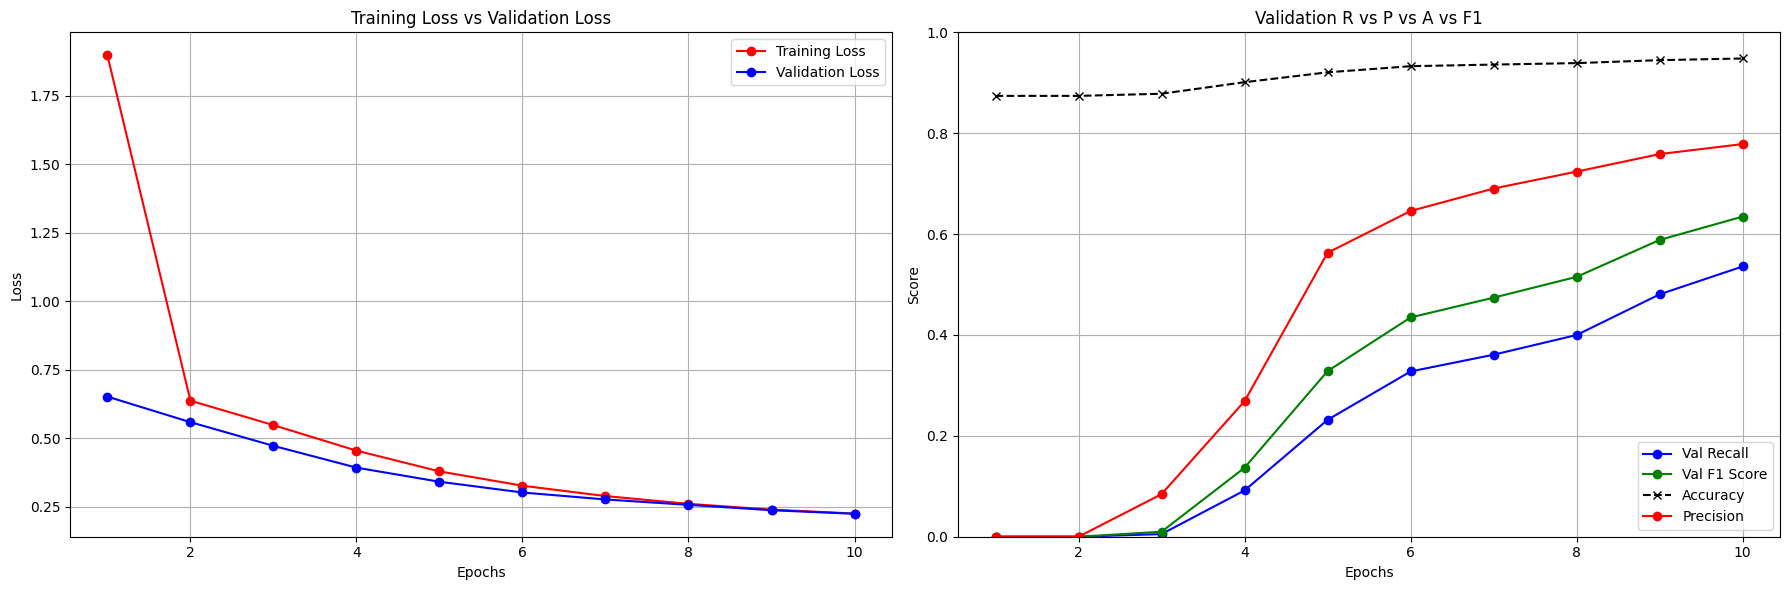

In [64]:
# plot evaluation metrics
plot_training_metrics(history_v1)

Observation: Model is actually learning and the overfitting at epoch 10 is almost negligible. But, a high accuracy of 94.82% with a low recall and precision of 53.58% shows that the model has learnt that predicting non-entity (label 'O') most of the times is a safe bet.

Implementing weighted loss strategy to tell the model that missing an entity is worst than getting a non-entity wrong.

To calculate weights, if the tag occurs more number of times like the non-entity tag 'O', we need to give it lower weight. Using sklearn class_weight utility to compute this.

In [23]:
from sklearn.utils.class_weight import compute_class_weight
def calc_weighted_loss(train_processed, id2label):
    """Calculates inverse-frequency class weights to handle dataset imbalance.

    This function computes weights for each class in the training set using 
    scikit-learn's 'balanced' heuristic. These weights are intended to be passed 
    to the loss function (e.g., CrossEntropyLoss) to penalize the model more 
    heavily for errors on rare classes (like B-PER) compared to common classes 
    (like O).

    Key behaviors:
    1.  Flattens the dataset labels into a single list.
    2.  Filters out the special ignore index -100.
    3.  Computes weights inversely proportional to class frequency.
    4.  Moves the resulting tensor to the active computing device (CPU/GPU).

    Args:
        train_processed (Dataset): The processed Hugging Face dataset containing 
            a 'labels' column (list of integer lists).
        id2label (dict): A dictionary mapping integer IDs to label strings 
            (e.g., {0: 'B-PER'}), used for logging purposes.

    Returns:
        torch.Tensor: A tensor of class weights with shape (num_classes,), 
        moved to the configured device.
    """
    #list of all tags in training set
    all_classes = [label
                  for row in train_processed['labels']
                    for label in row
                      if label != -100
    ]
    unique_classes = np.unique(all_classes)

    #balanced mode adjusts the weights inversly proportional to the frequencies of the classes
    weights = compute_class_weight(class_weight='balanced', classes = unique_classes, y = all_classes)

    #convert class weights to pytorch tensor
    class_weights = torch.tensor(weights, dtype=torch.float).to(device)

    print("Calculated Class Weights:")
    for i, weight in enumerate(class_weights):
        # getting label names from id2label
        label_name = id2label[i] if 'id2label' in locals() else str(i)
        print(f"{label_name}: {weight:.4f}")

    return class_weights

class_weights = calc_weighted_loss(train_distilbert, id2label)

Calculated Class Weights:
B-CODE: 15.6851
B-DATETIME: 2.4340
B-DEM: 33.6022
B-LOC: 13.7717
B-MISC: 68.8216
B-ORG: 9.5366
B-PERSON: 5.0459
B-QUANTITY: 45.8811
I-CODE: 504.6920
I-DATETIME: 1.4053
I-DEM: 54.5324
I-LOC: 41.7168
I-MISC: 19.3093
I-ORG: 4.0306
I-PERSON: 2.7905
I-QUANTITY: 30.2104
O: 0.0683


In [57]:
#trying similar architecture with weighted loss approach
lstm_nre_v2 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=256, weight_tensor=class_weights).to(device)
optimizer_v2 = torch.optim.Adam(lstm_nre_v2.parameters(), lr=1e-4)

Will the model learn more if I increase the number of epoches?

In [58]:
history_v2 = train_eval_lstm(lstm_nre_v2, optimizer_v2, n_epoches = 15)

Starting Bi-LSTM for NER training...
Epoch 1/15 | Train Loss: 2.7368 | Val Loss: 2.6221 | Val Recall: 0.4145 | Val Precision: 0.0453 |Val F1: 0.0816 |Val Accuracy: 0.4628
Epoch 2/15 | Train Loss: 2.4277 | Val Loss: 2.1327 | Val Recall: 0.4013 | Val Precision: 0.0501 |Val F1: 0.0891 |Val Accuracy: 0.4589
Epoch 3/15 | Train Loss: 1.8818 | Val Loss: 1.6070 | Val Recall: 0.4157 | Val Precision: 0.0586 |Val F1: 0.1028 |Val Accuracy: 0.5238
Epoch 4/15 | Train Loss: 1.5152 | Val Loss: 1.3953 | Val Recall: 0.4703 | Val Precision: 0.0743 |Val F1: 0.1283 |Val Accuracy: 0.5324
Epoch 5/15 | Train Loss: 1.3286 | Val Loss: 1.3718 | Val Recall: 0.4790 | Val Precision: 0.0845 |Val F1: 0.1437 |Val Accuracy: 0.5717
Epoch 6/15 | Train Loss: 1.1932 | Val Loss: 1.2425 | Val Recall: 0.4964 | Val Precision: 0.0874 |Val F1: 0.1486 |Val Accuracy: 0.5383
Epoch 7/15 | Train Loss: 1.0877 | Val Loss: 1.1930 | Val Recall: 0.5049 | Val Precision: 0.0909 |Val F1: 0.1541 |Val Accuracy: 0.5650
Epoch 8/15 | Train Loss: 

/var/folders/qw/2jrbyvsn4tnckwl2l1rgl1wm0000gp/T/ipykernel_54182/4064934705.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


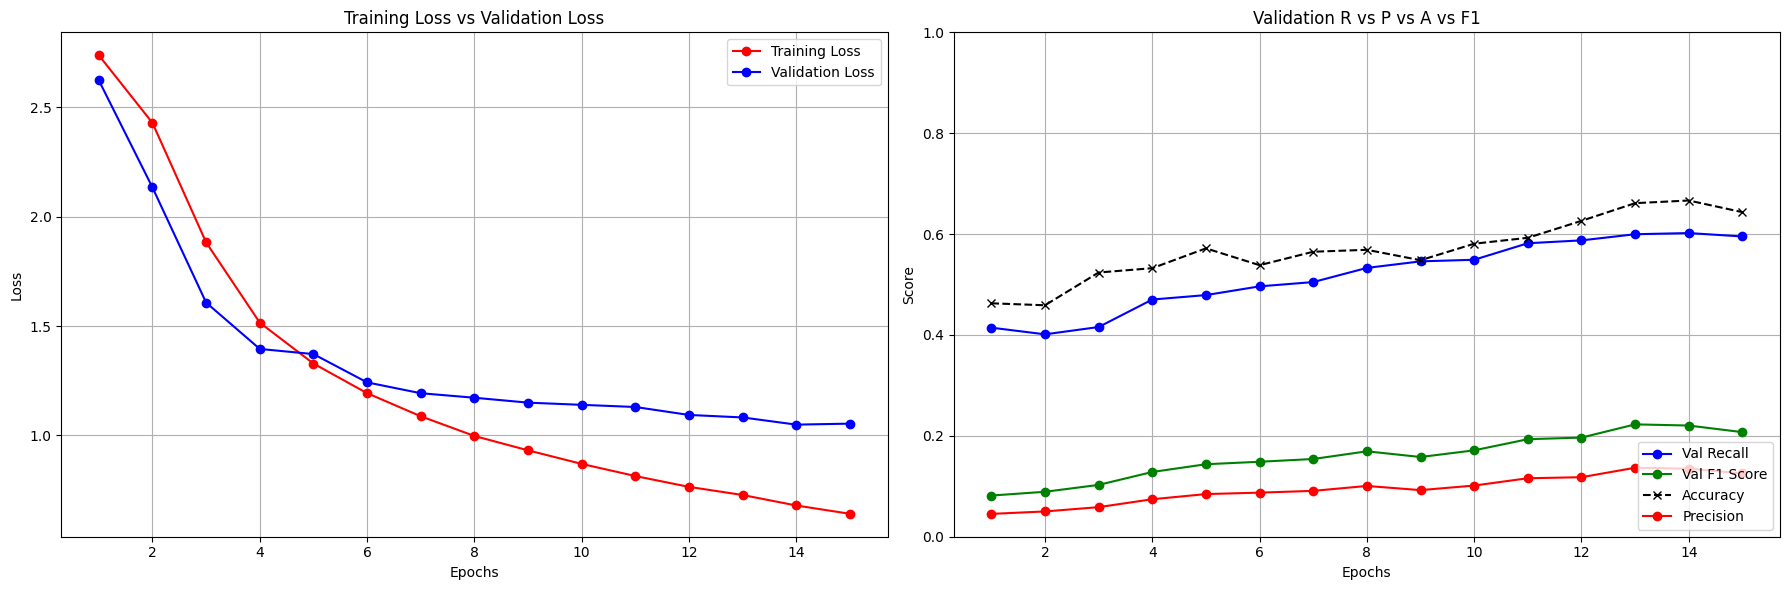

In [65]:
# plot evaluation metrics
plot_training_metrics(history_v2)

Observed that the model starts to overfit at epoch 5. The recall at epoch 14 has improved to 60.20% the precision has drastically dropped to 13.49%, showing that only 13.49% of the redacted words are actually sensetive! The accuracy has also dropped to 64.35%. The fact that the difference between the recall and accuracy has dropped is good.

What effect might it have if the number of nodes in the hidden layer of the network is increased while sticking to weighted loss strategy?

In [60]:
#increasing dimension of hidden layer without using weighted loss
lstm_nre_v3 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=288, weight_tensor=class_weights).to(device)
optimizer_v3 = torch.optim.Adam(lstm_nre_v3.parameters(), lr=1e-4)

In [61]:
history_v3 = train_eval_lstm(lstm_nre_v3, optimizer_v3, n_epoches = 13)

Starting Bi-LSTM for NER training...
Epoch 1/13 | Train Loss: 2.7300 | Val Loss: 2.6301 | Val Recall: 0.3408 | Val Precision: 0.0280 |Val F1: 0.0517 |Val Accuracy: 0.2777
Epoch 2/13 | Train Loss: 2.3913 | Val Loss: 2.0419 | Val Recall: 0.4345 | Val Precision: 0.0495 |Val F1: 0.0888 |Val Accuracy: 0.4185
Epoch 3/13 | Train Loss: 1.8169 | Val Loss: 1.5410 | Val Recall: 0.4156 | Val Precision: 0.0581 |Val F1: 0.1020 |Val Accuracy: 0.4998
Epoch 4/13 | Train Loss: 1.4734 | Val Loss: 1.6300 | Val Recall: 0.3454 | Val Precision: 0.0454 |Val F1: 0.0803 |Val Accuracy: 0.3642
Epoch 5/13 | Train Loss: 1.2789 | Val Loss: 1.4846 | Val Recall: 0.3966 | Val Precision: 0.0645 |Val F1: 0.1110 |Val Accuracy: 0.5201
Epoch 6/13 | Train Loss: 1.1515 | Val Loss: 1.4398 | Val Recall: 0.4109 | Val Precision: 0.0628 |Val F1: 0.1089 |Val Accuracy: 0.5251
Epoch 7/13 | Train Loss: 1.0518 | Val Loss: 1.3458 | Val Recall: 0.4535 | Val Precision: 0.0812 |Val F1: 0.1377 |Val Accuracy: 0.5872
Epoch 8/13 | Train Loss: 

/var/folders/qw/2jrbyvsn4tnckwl2l1rgl1wm0000gp/T/ipykernel_54182/4064934705.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


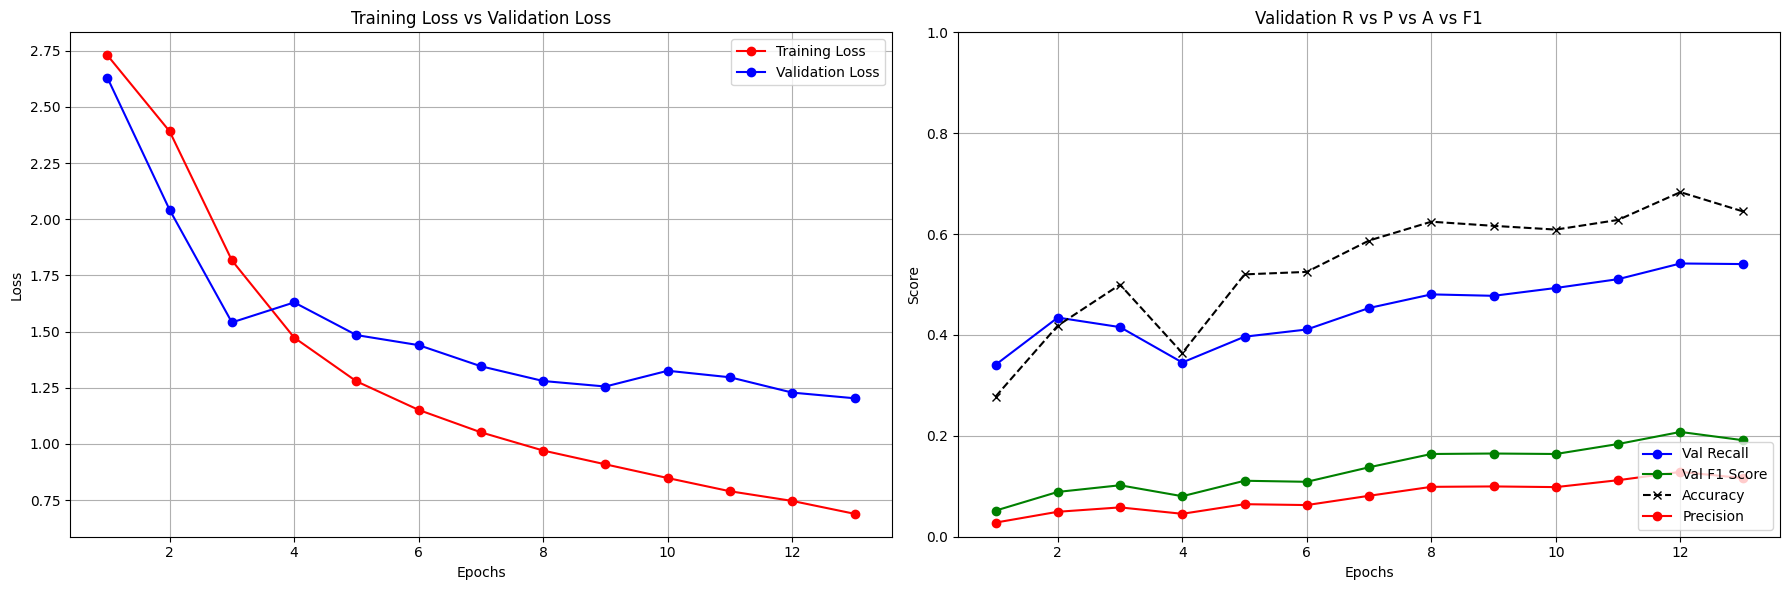

In [66]:
# plot evaluation metrics
plot_training_metrics(history_v3)

Observation: The model started to overfit at epoch 4. It kept learning however, the overfittin kept increasing. The best recall of 54.17% was achieved at epoch 12 which is less than the previous. Also, precision dropped to 12.85%.

Trying to decrease the number of nodes in the hidden layer.

In [68]:
#decreasing dimension of hidden layer without using weighted loss
lstm_nre_v4 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=192, weight_tensor=class_weights).to(device)
optimizer_v4 = torch.optim.Adam(lstm_nre_v4.parameters(), lr=1e-4)

In [69]:
history_v4 = train_eval_lstm(lstm_nre_v4, optimizer_v4, n_epoches = 10)

Starting Bi-LSTM for NER training...
Epoch 1/10 | Train Loss: 2.7665 | Val Loss: 2.6983 | Val Recall: 0.2294 | Val Precision: 0.0186 |Val F1: 0.0343 |Val Accuracy: 0.2569
Epoch 2/10 | Train Loss: 2.5669 | Val Loss: 2.4411 | Val Recall: 0.4203 | Val Precision: 0.0413 |Val F1: 0.0752 |Val Accuracy: 0.3915
Epoch 3/10 | Train Loss: 2.1927 | Val Loss: 1.9109 | Val Recall: 0.3583 | Val Precision: 0.0429 |Val F1: 0.0767 |Val Accuracy: 0.4224
Epoch 4/10 | Train Loss: 1.7667 | Val Loss: 1.6215 | Val Recall: 0.4188 | Val Precision: 0.0525 |Val F1: 0.0932 |Val Accuracy: 0.4248
Epoch 5/10 | Train Loss: 1.5149 | Val Loss: 1.5006 | Val Recall: 0.4207 | Val Precision: 0.0569 |Val F1: 0.1002 |Val Accuracy: 0.4587
Epoch 6/10 | Train Loss: 1.3489 | Val Loss: 1.3993 | Val Recall: 0.4788 | Val Precision: 0.0829 |Val F1: 0.1414 |Val Accuracy: 0.5643
Epoch 7/10 | Train Loss: 1.2209 | Val Loss: 1.3288 | Val Recall: 0.4844 | Val Precision: 0.0831 |Val F1: 0.1419 |Val Accuracy: 0.5322
Epoch 8/10 | Train Loss: 

/var/folders/qw/2jrbyvsn4tnckwl2l1rgl1wm0000gp/T/ipykernel_54182/4064934705.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


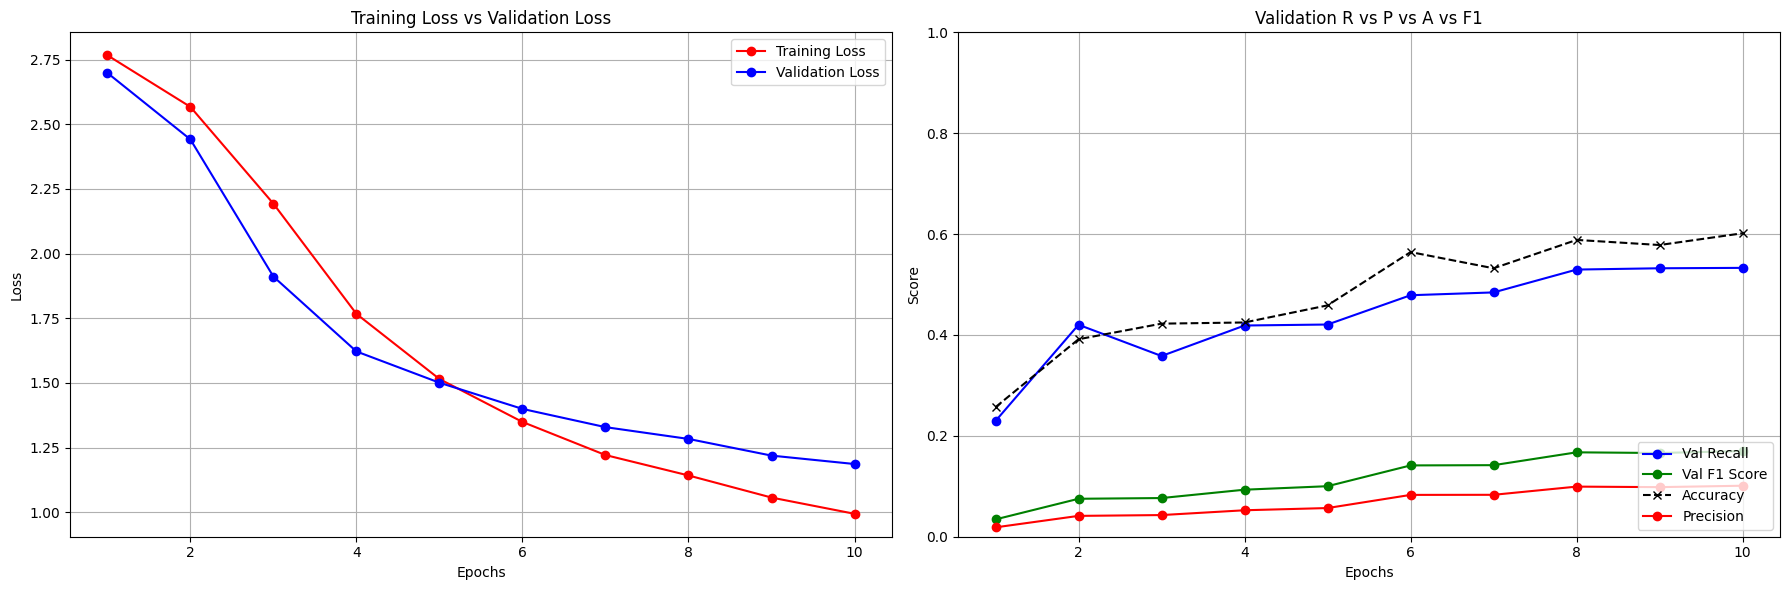

In [70]:
# plot evaluation metrics
plot_training_metrics(history_v4)

Observation: The best recall for this strategy is still 53.30% with precision of 10.11%. Going back to v2 and trying to recude overfitting by adding dropout.

In [71]:
#trying similar architecture with weighted loss approach
lstm_nre_v5 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=256, weight_tensor=class_weights, dropout_rate=0.2).to(device)
optimizer_v5 = torch.optim.Adam(lstm_nre_v5.parameters(), lr=1e-4)

In [72]:
history_v5 = train_eval_lstm(lstm_nre_v5, optimizer_v5, n_epoches = 15)

Starting Bi-LSTM for NER training...
Epoch 1/15 | Train Loss: 2.7417 | Val Loss: 2.6390 | Val Recall: 0.3258 | Val Precision: 0.0327 |Val F1: 0.0594 |Val Accuracy: 0.4004
Epoch 2/15 | Train Loss: 2.4480 | Val Loss: 2.2191 | Val Recall: 0.3823 | Val Precision: 0.0442 |Val F1: 0.0792 |Val Accuracy: 0.4665
Epoch 3/15 | Train Loss: 1.9265 | Val Loss: 1.7158 | Val Recall: 0.4618 | Val Precision: 0.0592 |Val F1: 0.1050 |Val Accuracy: 0.4450
Epoch 4/15 | Train Loss: 1.5451 | Val Loss: 1.4748 | Val Recall: 0.4533 | Val Precision: 0.0604 |Val F1: 0.1066 |Val Accuracy: 0.4358
Epoch 5/15 | Train Loss: 1.3244 | Val Loss: 1.3801 | Val Recall: 0.4994 | Val Precision: 0.0791 |Val F1: 0.1366 |Val Accuracy: 0.5151
Epoch 6/15 | Train Loss: 1.2011 | Val Loss: 1.2751 | Val Recall: 0.5101 | Val Precision: 0.0803 |Val F1: 0.1387 |Val Accuracy: 0.5037
Epoch 7/15 | Train Loss: 1.0833 | Val Loss: 1.2259 | Val Recall: 0.5107 | Val Precision: 0.0809 |Val F1: 0.1396 |Val Accuracy: 0.5277
Epoch 8/15 | Train Loss: 

/var/folders/qw/2jrbyvsn4tnckwl2l1rgl1wm0000gp/T/ipykernel_54182/4064934705.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


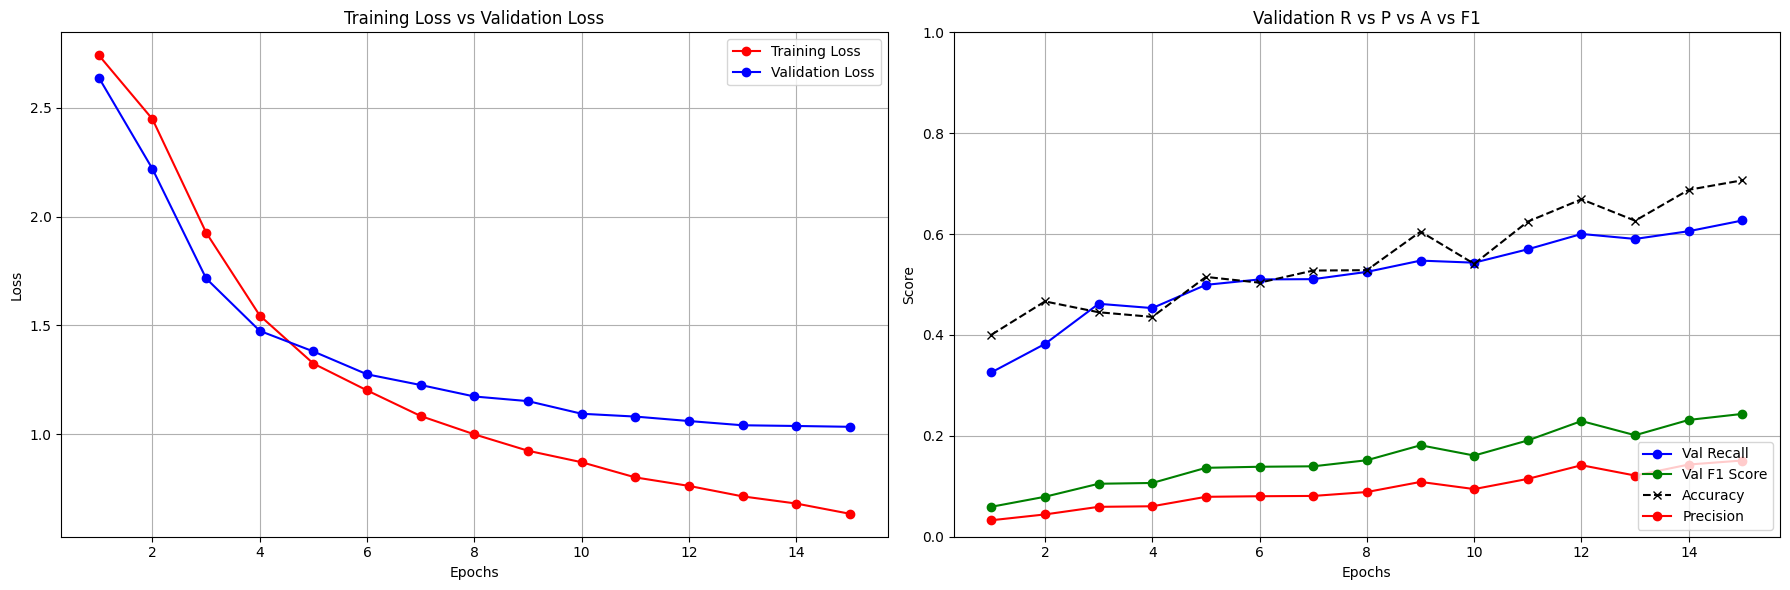

In [73]:
# plot evaluation metrics
plot_training_metrics(history_v5)

Observation: This strategy has shown increased overfitting but the Recall has increased to 62.70% and the precision to 15.11%

Trying an approach where increasing the number of nodes in the hidden layer without the weighted loss or dropout strategy.

In [86]:
#increasing dimension of hidden layer more without using weighted loss
lstm_nre_v6 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=480).to(device)
optimizer_v6 = torch.optim.Adam(lstm_nre_v6.parameters(), lr=1e-4)

In [75]:
history_v6 = train_eval_lstm(lstm_nre_v6, optimizer_v6, n_epoches = 30)

Starting Bi-LSTM for NER training...


/opt/anaconda3/envs/hf-venv/lib/python3.11/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/hf-venv/lib/python3.11/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/30 | Train Loss: 1.4469 | Val Loss: 0.6069 | Val Recall: 0.0000 | Val Precision: 0.0000 |Val F1: 0.0000 |Val Accuracy: 0.8740
Epoch 2/30 | Train Loss: 0.5894 | Val Loss: 0.5076 | Val Recall: 0.0003 | Val Precision: 0.0180 |Val F1: 0.0005 |Val Accuracy: 0.8747
Epoch 3/30 | Train Loss: 0.4662 | Val Loss: 0.3813 | Val Recall: 0.1525 | Val Precision: 0.3858 |Val F1: 0.2186 |Val Accuracy: 0.9120
Epoch 4/30 | Train Loss: 0.3580 | Val Loss: 0.3131 | Val Recall: 0.3056 | Val Precision: 0.6313 |Val F1: 0.4119 |Val Accuracy: 0.9299
Epoch 5/30 | Train Loss: 0.2987 | Val Loss: 0.2761 | Val Recall: 0.4033 | Val Precision: 0.7152 |Val F1: 0.5158 |Val Accuracy: 0.9378
Epoch 6/30 | Train Loss: 0.2596 | Val Loss: 0.2498 | Val Recall: 0.4614 | Val Precision: 0.7473 |Val F1: 0.5705 |Val Accuracy: 0.9419
Epoch 7/30 | Train Loss: 0.2355 | Val Loss: 0.2332 | Val Recall: 0.4924 | Val Precision: 0.7583 |Val F1: 0.5971 |Val Accuracy: 0.9444
Epoch 8/30 | Train Loss: 0.2164 | Val Loss: 0.2191 | Val Recal

/var/folders/qw/2jrbyvsn4tnckwl2l1rgl1wm0000gp/T/ipykernel_54182/4064934705.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


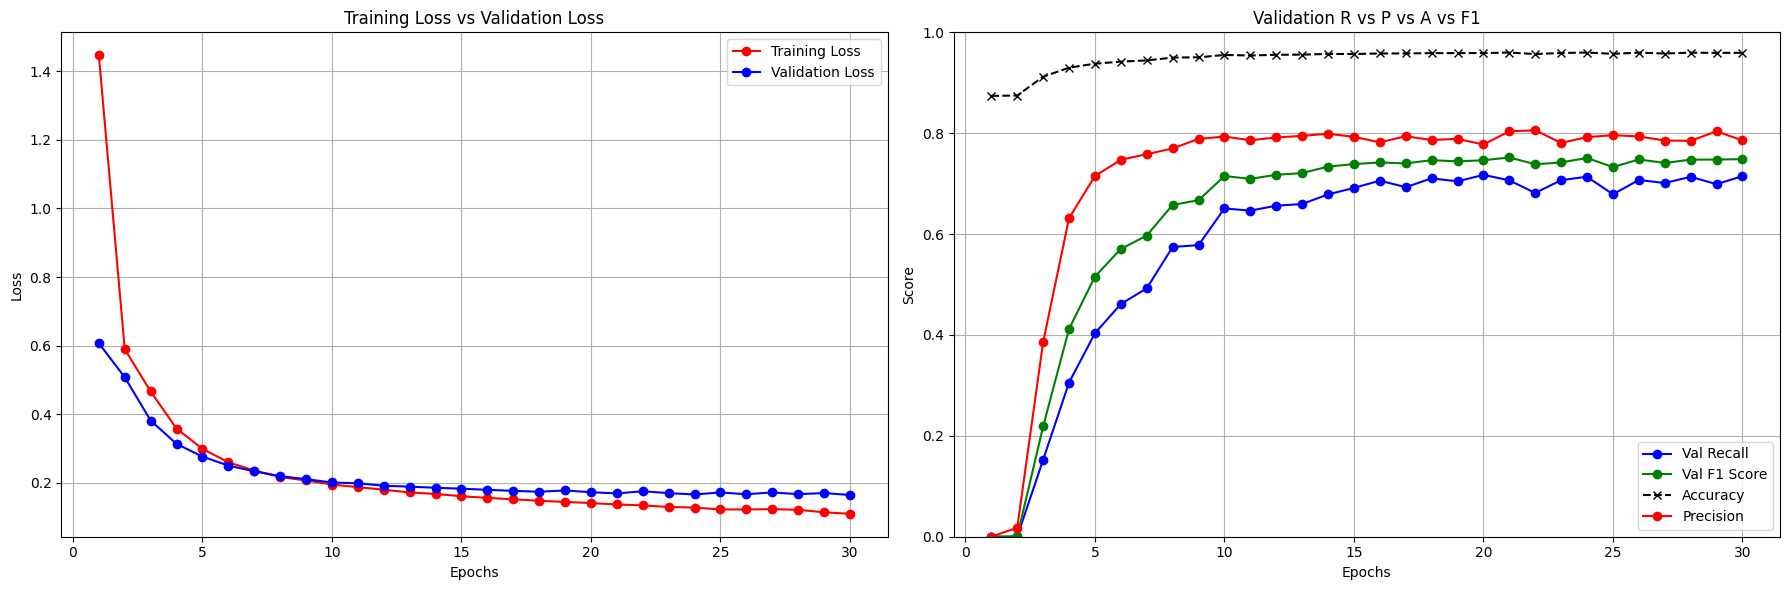

In [76]:
# plot evaluation metrics
plot_training_metrics(history_v6)

Observation: After epoch 10 the model is learning slowly but could reach 71.75% recall and 77.77% precision at epoch 20 however, the model is not learning much after that. Some amount of overfitting is seen after epoch 10.

Adding dropout layers to reduce overfitting.

In [77]:
#adding dropout layer to reduce overfitting and reducing epoches
lstm_nre_v7 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=480, dropout_rate=0.2).to(device)
optimizer_v7 = torch.optim.Adam(lstm_nre_v7.parameters(), lr=1e-4)

In [78]:
history_v7 = train_eval_lstm(lstm_nre_v7, optimizer_v7, n_epoches = 21)

Starting Bi-LSTM for NER training...


/opt/anaconda3/envs/hf-venv/lib/python3.11/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/hf-venv/lib/python3.11/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/21 | Train Loss: 1.4933 | Val Loss: 0.6183 | Val Recall: 0.0000 | Val Precision: 0.0000 |Val F1: 0.0000 |Val Accuracy: 0.8740
Epoch 2/21 | Train Loss: 0.6024 | Val Loss: 0.5115 | Val Recall: 0.0003 | Val Precision: 0.0126 |Val F1: 0.0005 |Val Accuracy: 0.8741
Epoch 3/21 | Train Loss: 0.4649 | Val Loss: 0.3773 | Val Recall: 0.1562 | Val Precision: 0.4029 |Val F1: 0.2251 |Val Accuracy: 0.9114
Epoch 4/21 | Train Loss: 0.3578 | Val Loss: 0.3229 | Val Recall: 0.3080 | Val Precision: 0.5658 |Val F1: 0.3989 |Val Accuracy: 0.9298
Epoch 5/21 | Train Loss: 0.2973 | Val Loss: 0.2803 | Val Recall: 0.3433 | Val Precision: 0.5965 |Val F1: 0.4358 |Val Accuracy: 0.9335
Epoch 6/21 | Train Loss: 0.2602 | Val Loss: 0.2581 | Val Recall: 0.4591 | Val Precision: 0.6688 |Val F1: 0.5444 |Val Accuracy: 0.9414
Epoch 7/21 | Train Loss: 0.2349 | Val Loss: 0.2417 | Val Recall: 0.5251 | Val Precision: 0.6909 |Val F1: 0.5967 |Val Accuracy: 0.9442
Epoch 8/21 | Train Loss: 0.2181 | Val Loss: 0.2255 | Val Recal

/var/folders/qw/2jrbyvsn4tnckwl2l1rgl1wm0000gp/T/ipykernel_54182/4064934705.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


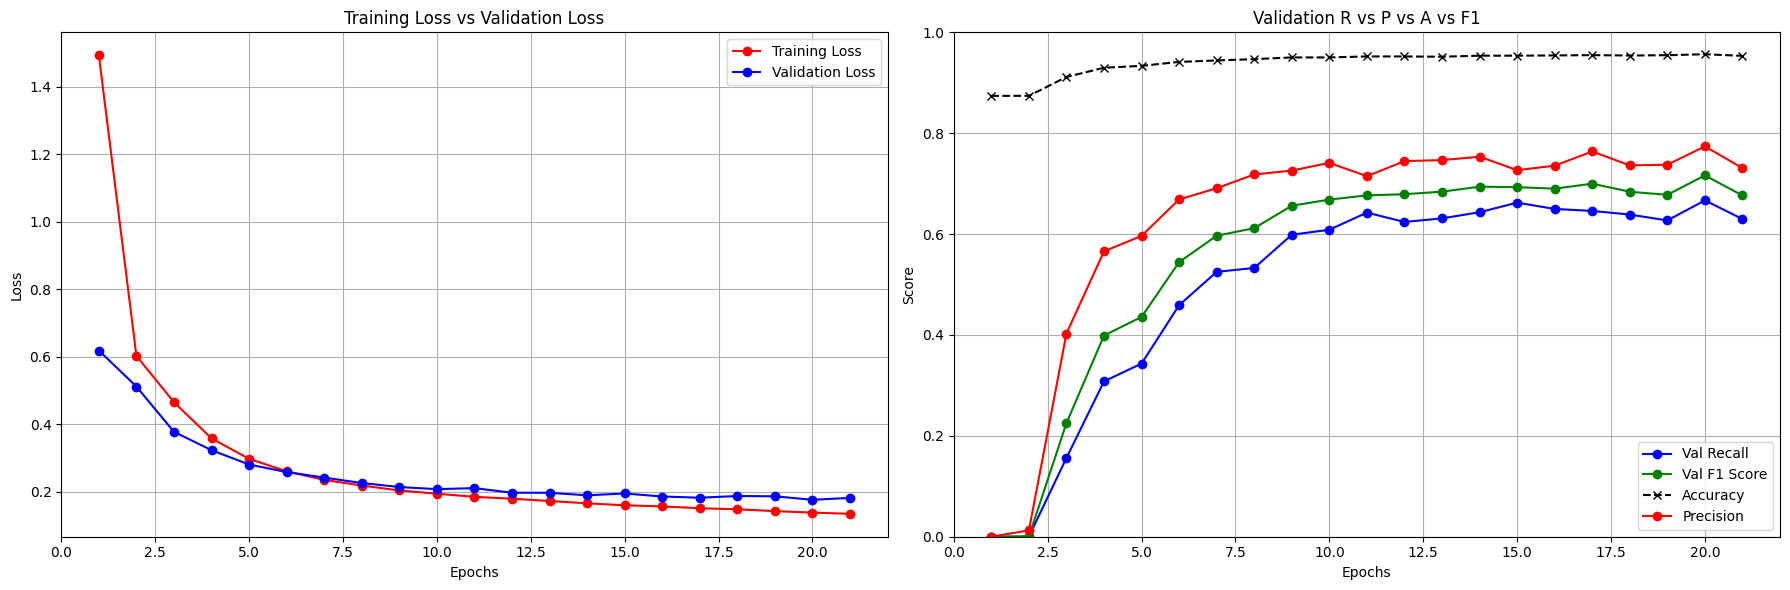

In [79]:
# plot evaluation metrics
plot_training_metrics(history_v7)

Observation: There is not much change in the overfitting but the max recall achieved at epoch 20 is 66.68% which is lower than the previous model.

Implementing early stopping on v6 for final training run.

In [87]:
#increasing dimension of hidden layer more without using weighted loss
lstm_nre_v8 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=480).to(device)
optimizer_v8 = torch.optim.Adam(lstm_nre_v8.parameters(), lr=1e-4)

In [88]:
history_v8 = train_eval_lstm(lstm_nre_v8, optimizer_v8, n_epoches = 30, early_stopping=True)

Starting Bi-LSTM for NER training...
Epoch 1/30 | Train Loss: 1.4340 | Val Loss: 0.6030 | Val Recall: 0.0000 | Val Precision: 0.0000 |Val F1: 0.0000 |Val Accuracy: 0.8740
Validation Loss improved from inf to 0.6030.
Epoch 2/30 | Train Loss: 0.5813 | Val Loss: 0.4920 | Val Recall: 0.0031 | Val Precision: 0.0518 |Val F1: 0.0059 |Val Accuracy: 0.8771
Validation Loss improved from 0.6030 to 0.4920.
Epoch 3/30 | Train Loss: 0.4541 | Val Loss: 0.3848 | Val Recall: 0.1516 | Val Precision: 0.3897 |Val F1: 0.2183 |Val Accuracy: 0.9097
Validation Loss improved from 0.4920 to 0.3848.
Epoch 4/30 | Train Loss: 0.3587 | Val Loss: 0.3252 | Val Recall: 0.2991 | Val Precision: 0.6135 |Val F1: 0.4021 |Val Accuracy: 0.9298
Validation Loss improved from 0.3848 to 0.3252.
Epoch 5/30 | Train Loss: 0.2967 | Val Loss: 0.2851 | Val Recall: 0.3432 | Val Precision: 0.6598 |Val F1: 0.4515 |Val Accuracy: 0.9342
Validation Loss improved from 0.3252 to 0.2851.
Epoch 6/30 | Train Loss: 0.2590 | Val Loss: 0.2589 | Val

/var/folders/qw/2jrbyvsn4tnckwl2l1rgl1wm0000gp/T/ipykernel_54182/4064934705.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')


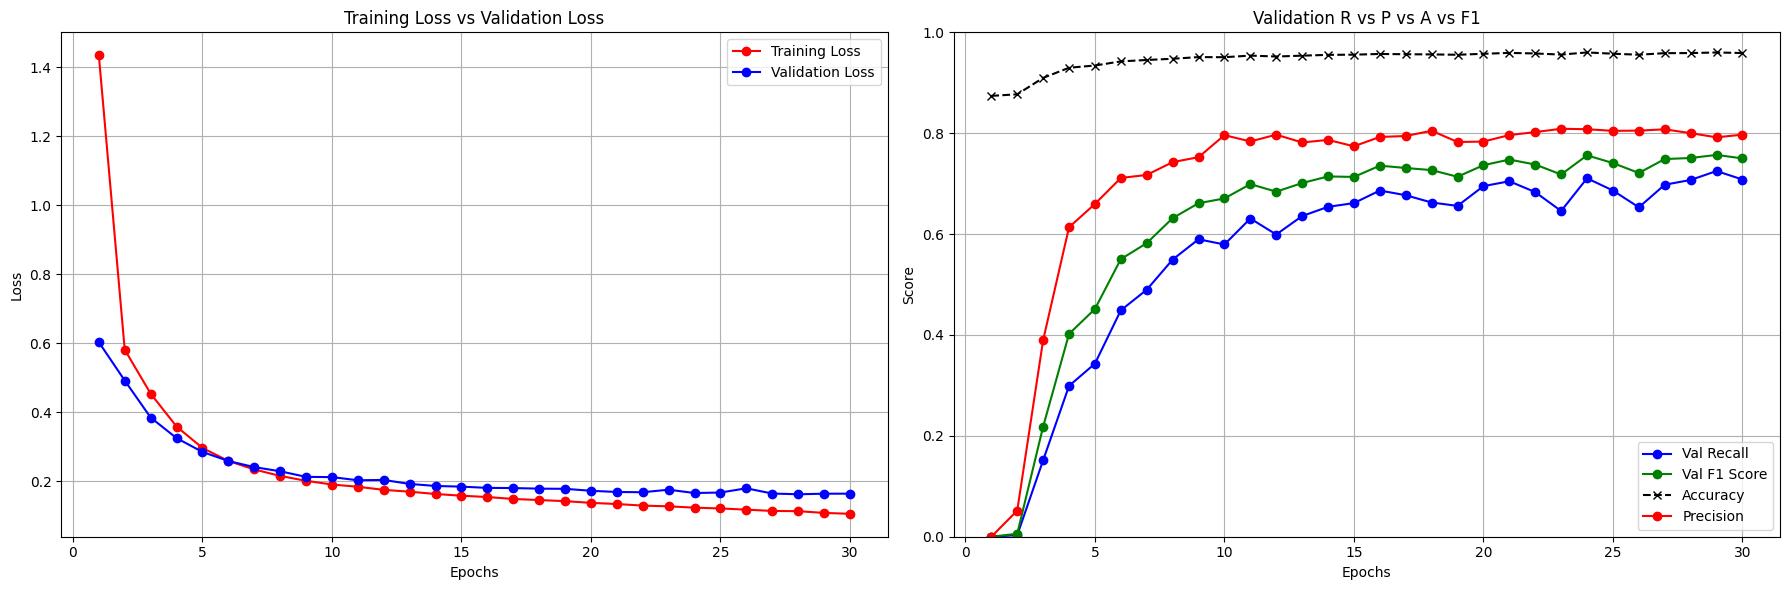

In [89]:
# plot evaluation metrics
plot_training_metrics(history_v8)

Observation: The validation loss stopped improving for 2 epoches twice but then improved again, so no early stopping was triggered. The epoch 29 gave us the best model with:
Train Loss: 0.1085
Val Loss: 0.1641
Val Recall: 72.50%
Val Precision: 79.19%
Val F1: 75.70%
Val Accuracy: 96.01%

Evaluating this best bi-lstm-model on test set.

In [90]:
lstm_ner_metrics = evaluate_epoch(lstm_nre_v8, test_loader, label_list)

In [ ]:
def print_results(lstm_ner_metrics):
    """Prints a formatted summary of the model's performance metrics.

    This function takes the evaluation dictionary (usually from the test set) 
    and prints the Loss, Accuracy, Precision, Recall, and F1 score. It converts 
    the float scores (0.0-1.0) into percentages and provides a brief 
    contextual explanation for each metric regarding the redaction task.

    Args:
        lstm_ner_metrics (dict): A dictionary containing the following keys:
            - 'val_loss' (float): The loss value.
            - 'accuracy', 'precision', 'recall', 'f1' (float): Metric scores 
              between 0.0 and 1.0.

    Returns:
        None: Output is printed directly to stdout.
    """
    print(f"Testing Loss: {lstm_ner_metrics['val_loss']}")
    print(f"Accuracy: {(lstm_ner_metrics['accuracy'] * 100):.4f}% - tokens were correctly classified")
    print(f"Precision: {(lstm_ner_metrics['precision'] * 100):.4f}% - were correctly redacted out of all redacted tokens")
    print(f"Recall: {(lstm_ner_metrics['recall'] * 100):.4f}% - tokens were correctly identified for redaction")
    print(f"F1: {(lstm_ner_metrics['f1'] * 100):.4f}% - is the readability score")

print_results(lstm_ner_metrics)

Testing Loss: 0.17113963535853793
Accuracy: 95.6999% - tokens were correctly classified
Precision: 80.1607% - were correctly redacted out of all redacted tokens
Recall: 69.4476% - tokens were correctly identified for redaction
F1: 74.4206% - is the readability score


### Lessons Learnt (Jui)

1. Choose to write code in pyTorch whereby learning to write the forward and backward pass. Also learnt the exact workings of Bi-LSTM and all steps of the training process.
1. Wrote an evaluation function for evaluating after every epoch whereby learning about the intricacies of evaluation for NER problems.
1. Learnt that every run of the code gives different results unless a seed is set to a constant number. This happenes because the weights are initialized randomly and without a seed, this random state is different for every run giving non-deterministic results.
1. Learnt the tokenization process for NER problems and BERT models.
1. Learnt manual fine-tuning by reading the results for each training experiment.
1. Learnt to use local CUDA and MPS devices for faster training.
1. Learnt to work, manage and drive results in a team of people with different tempraments and backgrounds.

### 5. LegalBERT Finetuning (Liza)

Using legalBERT tokenizer

In [3]:
#add for legalBERT
# tokenizer_legalbert = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# 5. Legal-BERT Finetuning (Liza)

#!pip install seqeval evaluate transformers datasets

import numpy as np
import pandas as pd
import evaluate
from functools import partial
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer, DataCollatorForTokenClassification

# going with legal-bert since it handles domain specific terms better than vanilla bert
model_checkpoint = "nlpaueb/legal-bert-base-uncased"
tokenizer_legal = AutoTokenizer.from_pretrained(model_checkpoint)
metric = evaluate.load("seqeval")
    
# standard bio tags
label_list = ["O", "B-PER", "I-PER", "B-LOC", "I-LOC", "B-ORG", "I-ORG"]
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}

# just mapping raw types to our simplified schema
type_mapper = {"PERSON": "PER", "ORGANIZATION": "ORG", "LOCATION": "LOC", "ORG": "ORG", "LOC": "LOC", "PER": "PER"}

def tokenize_and_align_labels(examples, tokenizer):
    # the main tricky part: raw data gives us char indices (start=10, end=15),
    # but bert sees tokens. simply splitting by space fails on punctuation (e.g. "Ivanov,").
    # so i'm using offset_mapping from the tokenizer to align labels correctly.
    

    tokenized_inputs = tokenizer(
        examples["text"], truncation=True, max_length=512,
        return_offsets_mapping=True, padding="max_length"
    )
    labels = []

    for i, doc_offsets in enumerate(tokenized_inputs["offset_mapping"]):
        doc_mentions = examples["entity_mentions"][i] if examples["entity_mentions"][i] is not None else []

        doc_labels = [0] * len(doc_offsets)
        for idx, (start, end) in enumerate(doc_offsets):
            if start == end:
                doc_labels[idx] = -100 # ignore special tokens
                continue

            for mention in doc_mentions:
                if start >= mention['start_offset'] and end <= mention['end_offset']:
                    raw_type = mention['entity_type']
                    short_type = type_mapper.get(raw_type, "ORG")

                    # logic for B- vs I- tags
                    prefix = "B-" if start == mention['start_offset'] else "I-"
                    label_name = f"{prefix}{short_type}"
                    doc_labels[idx] = label2id.get(label_name, 0)
                    break
        labels.append(doc_labels)

    tokenized_inputs["labels"] = labels
    tokenized_inputs.pop("offset_mapping") # we don't need this for training
    return tokenized_inputs

# using the shared dataframes (df_train etc) loaded at the top of the notebook
# converting them to hf dataset format and applying the alignment fix
print("prepping data for legal-bert...")

raw_datasets = DatasetDict({
    "train": Dataset.from_pandas(df_train),
    "validation": Dataset.from_pandas(df_validation),
    "test": Dataset.from_pandas(df_test)
})

tokenized_datasets = raw_datasets.map(
    partial(tokenize_and_align_labels, tokenizer=tokenizer_legal),
    batched=True,
    remove_columns=raw_datasets["train"].column_names
)
print("done. tokens aligned.")


/home/fred/anaconda3/envs/LDR-NER/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


prepping data for legal-bert...


Map: 100%|██████████| 555/555 [00:00<00:00, 709.81 examples/s]

done. tokens aligned.


In [13]:
# initializing the model
model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
)

# standard hyperparams for bert fine-tuning.
# 3 epochs is usually enough for transfer learning to converge.
args = TrainingArguments(
    "legal-bert-ner",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="no",
    logging_steps=50
)

# using the Trainer api to handle the training loop efficiently
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=DataCollatorForTokenClassification(tokenizer_legal)
)

print("starting training...")
trainer.train()

Loading weights: 100%|██████████| 197/197 [00:00<00:00, 872.75it/s, Materializing param=bert.encoder.layer.11.output.dense.weight]              
BertForTokenClassification LOAD REPORT from: nlpaueb/legal-bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.decoder.bias               | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
bert.pooler.dense.weight                   | UNEXPECTED | 
bert.pooler.dense.bias                     | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.decoder.weight             | UNEXPECTED | 
classifier.

starting training...


Epoch,Training Loss,Validation Loss
1,0.504909,0.133475
2,0.134588,0.104182
3,0.091035,0.101755


TrainOutput(global_step=210, training_loss=0.2026848520551409, metrics={'train_runtime': 1773.6059, 'train_samples_per_second': 1.881, 'train_steps_per_second': 0.118, 'total_flos': 871725384769536.0, 'train_loss': 0.2026848520551409, 'epoch': 3.0})

In [14]:
def evaluate_model_performance(trainer, eval_dataset, model_name="MyModel"):
    # getting predictions and filtering out the -100 ignored tokens
    # to calculate real metrics
    print(f"--- evaluating {model_name} ---")
    predictions, labels, _ = trainer.predict(eval_dataset)
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)

    return {
        "Model": model_name,
        "F1 Score": results['overall_f1'],
        # recall is critical here - we can't miss sensitive info
        "Recall": results['overall_recall'],
        "Precision": results['overall_precision'],
        "Accuracy": results['overall_accuracy']
    }

metrics_legal = evaluate_model_performance(trainer, tokenized_datasets["test"], model_name="Legal-BERT (Liza)")

print("\n final results:")
display(pd.DataFrame([metrics_legal]).round(4))

--- evaluating Legal-BERT (Liza) ---



 final results:


,Model,F1 Score,Recall,Precision,Accuracy
0,Legal-BERT (Liza),0.8192,0.8393,0.8001,0.9651


In [ ]:
# train_legalbert = preprocess_data(df_train ,tokenizer_legalbert)
# test_legalbert = preprocess_data(df_test, tokenizer_legalbert)
# validation_legalbert = preprocess_data(df_validation, tokenizer_legalbert)

Saving model to ./legal_bert_output...


Writing model shards: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


History saved to ./legal_bert_output/training_history.json
Graph saved to ./legal_bert_output/training_graph.png


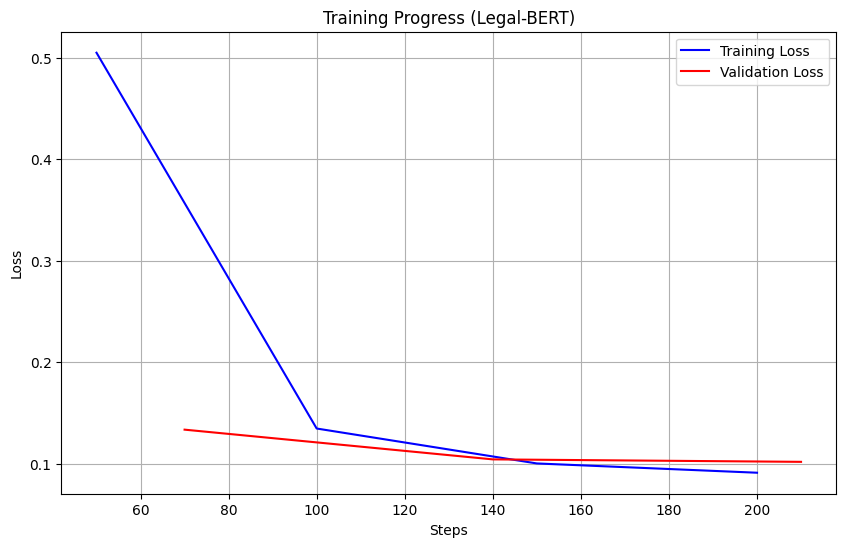

In [16]:
import matplotlib.pyplot as plt
import json
import os

output_dir = "./legal_bert_output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Saving model to {output_dir}...")
trainer.save_model(output_dir)
tokenizer_legal.save_pretrained(output_dir)

history = trainer.state.log_history
history_path = f"{output_dir}/training_history.json"
with open(history_path, "w") as f:
    json.dump(history, f)
print(f"History saved to {history_path}")

train_loss = [x['loss'] for x in history if 'loss' in x]
steps = [x['step'] for x in history if 'loss' in x]

if train_loss:
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_loss, label="Training Loss", color="blue")

    val_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]
    val_steps = [x['step'] for x in history if 'eval_loss' in x]
    if val_loss:
        plt.plot(val_steps, val_loss, label="Validation Loss", color="red")

    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training Progress (Legal-BERT)")
    plt.legend()
    plt.grid(True)

    graph_path = f"{output_dir}/training_graph.png"
    plt.savefig(graph_path)
    print(f"Graph saved to {graph_path}")
    plt.show()
else:
    print("Not enough history to plot graph yet.")

### 6. DistilBERT (Ritvik & Mit)

Using tokenized datasets: train_distilbert, test_distilbert, validation_distilbert

In [5]:
import numpy as np
import pandas as pd
import torch
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer, DataCollatorForTokenClassification
from transformers import DistilBertForTokenClassification

"""
setting up distilbert as our baseline model.
it is lighter and faster than legal-bert and has fewer parameters.

"""
distil_checkpoint = "distilbert-base-uncased" # letter case independent 
distil_tokenizer = AutoTokenizer.from_pretrained(distil_checkpoint) # using autotokenizer

label_list = ["O", "B-PER", "I-PER", "B-LOC", "I-LOC", "B-ORG", "I-ORG"]
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}
type_mapper = {"PERSON": "PER", "ORGANIZATION": "ORG", "LOCATION": "LOC", "ORG": "ORG", "LOC": "LOC", "PER": "PER"}

In [6]:
import torch
print(f"Is GPU available? {torch.cuda.is_available()}")
print(f"Device Name: {torch.cuda.get_device_name(0)}")

Is GPU available? True
Device Name: NVIDIA GeForce RTX 3050 Laptop GPU


In [7]:
def tokenize_and_align_distil(examples):

    """
        Instead of relying on spaces and commas to create tokens, we are using offset mapping
        To make sure that the tokens align well with the BERT model and they come from the correct offsets in the dataset

    """

    tokenized_inputs = distil_tokenizer(
        examples["text"], truncation=True, max_length=512,
        return_offsets_mapping=True, padding="max_length" # padding the tokens with max token length
    )
    labels = []

    for i, doc_offsets in enumerate(tokenized_inputs["offset_mapping"]):
        doc_mentions = examples["entity_mentions"][i] if examples["entity_mentions"][i] is not None else []
        
        doc_labels = [0] * len(doc_offsets)
        for idx, (start, end) in enumerate(doc_offsets):
            if start == end:
                doc_labels[idx] = -100 # ignore special tokens
                continue

            for mention in doc_mentions:
                if start >= mention['start_offset'] and end <= mention['end_offset']:
                    raw_type = mention['entity_type']
                    short_type = type_mapper.get(raw_type, "ORG")
                    
                    # logic to check beginning and inside of tokens
                    prefix = "B-" if start == mention['start_offset'] else "I-"
                    label_name = f"{prefix}{short_type}"
                    doc_labels[idx] = label2id.get(label_name, 0)
                    break
        labels.append(doc_labels)

    tokenized_inputs["labels"] = labels
    tokenized_inputs.pop("offset_mapping")
    return tokenized_inputs


# creating a dataset dict
distil_datasets = DatasetDict({
    "train": Dataset.from_pandas(df_train),
    "validation": Dataset.from_pandas(df_validation),
    "test": Dataset.from_pandas(df_test)
})

distil_tokenized = distil_datasets.map(
    tokenize_and_align_distil,
    batched=True,
    remove_columns=distil_datasets["train"].column_names
)
print("done. distilbert tokens aligned.")

Map: 100%|██████████| 555/555 [00:01<00:00, 343.58 examples/s]

done. distilbert tokens aligned.


#### Baseline DistilBERT Model (kesha)

In [8]:
# initializing the distilbert model
distil_model = AutoModelForTokenClassification.from_pretrained(
    distil_checkpoint,
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
distil_model.to(device)

# setting hyperparams
db_args = TrainingArguments(
    "distilbert-ner-output",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="no",
    logging_steps=50,
    seed=42,
    data_seed=42,
)

db_trainer = Trainer(
    model=distil_model,
    args=db_args,
    train_dataset=distil_tokenized["train"],
    eval_dataset=distil_tokenized["validation"],
    data_collator=DataCollatorForTokenClassification(distil_tokenizer)
)

print("starting distilbert training...")
db_trainer.train()

Loading weights: 100%|██████████| 100/100 [00:00<00:00, 543.76it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForTokenClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
classifier.weight       | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


starting distilbert training...


Epoch,Training Loss,Validation Loss
1,0.525557,0.161509
2,0.159323,0.118078
3,0.103047,0.118716


TrainOutput(global_step=210, training_loss=0.22058556817826772, metrics={'train_runtime': 194.0184, 'train_samples_per_second': 17.194, 'train_steps_per_second': 1.082, 'total_flos': 435898146004992.0, 'train_loss': 0.22058556817826772, 'epoch': 3.0})

Model Evaluation

In [9]:
import evaluate
import numpy as np
import pandas as pd

# initialize metric
metric = evaluate.load("seqeval")

def evaluate_model_performance(trainer, eval_dataset, model_name):
    # getting predictions and filtering out the -100 ignored tokens
    # to calculate real metrics
    print(f"--- evaluating {model_name} ---")
    predictions, labels, _ = trainer.predict(eval_dataset)
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)

    return {
        "Model": model_name,
        "F1 Score": results['overall_f1'],
        # recall is critical here as we can't miss sensitive info
        "Recall": results['overall_recall'],
        "Precision": results['overall_precision'],
        "Accuracy": results['overall_accuracy']
    }

metrics_db = evaluate_model_performance(db_trainer, distil_tokenized["test"], model_name="DistilBERT_v1")

--- evaluating DistilBERT_v1 ---



 final results (DistilBERT):


,Model,F1 Score,Recall,Precision,Accuracy
0,DistilBERT_v1,0.7982,0.8173,0.78,0.9587


saving model to ./distilbert_output_v2...


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


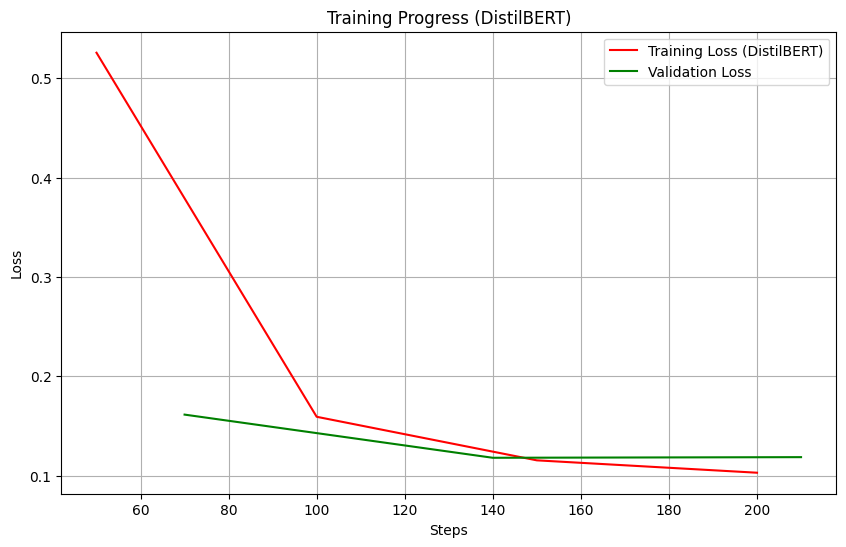

In [10]:
# evaluation Plots
print("\n final results (DistilBERT):")
display(pd.DataFrame([metrics_db]).round(4))

# saving and plotting
import matplotlib.pyplot as plt
import json
import os

output_dir = "./distilbert_output_v2"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"saving model to {output_dir}...")
db_trainer.save_model(output_dir)
distil_tokenizer.save_pretrained(output_dir)

history = db_trainer.state.log_history
# filtering for loss values to plot
train_loss = [x['loss'] for x in history if 'loss' in x]
steps = [x['step'] for x in history if 'loss' in x]

if train_loss:
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_loss, label="Training Loss (DistilBERT)", color="Red")
    
    # checking for validation loss
    val_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]
    val_steps = [x['step'] for x in history if 'eval_loss' in x]
    
    if val_loss:
        plt.plot(val_steps, val_loss, label="Validation Loss", color="Green")
        
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training Progress (DistilBERT)")
    plt.legend()
    plt.grid(True)
    plt.show()

Observation: The model accuracy is quite high (0.95), while the recall is low (0.82). Since our dataset has mostly 'O' in places of non-sensitive words, 
the model becomes lazy and predicts sensitive words as non-sensitive to gain a higher accuracy. This is also critical because we are working on legal data and in this domain, it is very costly for the model to miss sensitive words.

Fine-Tuning strategy 1: Implement Early Stopping and Label Smoothing

#### DistilBERT Fine-Tuned v2 (Ritvik)

In [ ]:
from transformers import EarlyStoppingCallback
# initializing the distilbert model
distil_model_v2 = AutoModelForTokenClassification.from_pretrained(
    distil_checkpoint,
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
distil_model_v2.to(device)

# setting hyperparams
db_args = TrainingArguments(
    "distilbert-ner-v2-output",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    num_train_epochs=5, # increased Epochs to train more
    weight_decay=0.05, # increased to reduce memorisation
    logging_steps=50,
    metric_for_best_model="loss",
    label_smoothing_factor=0.1, # helps with class imbalance problem as it gives less weights to each label 
    seed=42,
    data_seed=42 
)

db_trainer_v2 = Trainer(
    model=distil_model_v2,
    args=db_args,
    train_dataset=distil_tokenized["train"],
    eval_dataset=distil_tokenized["validation"],
    data_collator=DataCollatorForTokenClassification(distil_tokenizer),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("starting distilbert v2 training...")
db_trainer_v2.train()
metrics_db = evaluate_model_performance(db_trainer_v2, distil_tokenized["test"], model_name="DistilBERT_v2")
print("\n final results (DistilBERT):")
display(pd.DataFrame([metrics_db]).round(4))

Loading weights: 100%|██████████| 100/100 [00:00<00:00, 517.87it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForTokenClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
classifier.weight       | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


starting distilbert v2 training...


Epoch,Training Loss,Validation Loss
1,0.839470,0.555659
2,0.550116,0.526227
3,0.514136,0.522698
4,0.514076,0.523622
5,0.503792,0.523969


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
There were missing keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias'].
There were unexpected keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.beta', 'distilbert.embeddings.LayerNorm.gamma'].


--- evaluating DistilBERT_v2 ---



 final results (DistilBERT):


,Model,F1 Score,Recall,Precision,Accuracy
0,DistilBERT_v2,0.806,0.8295,0.7839,0.9605


saving model to ./distilbert_output_fine-tuned_v2...


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


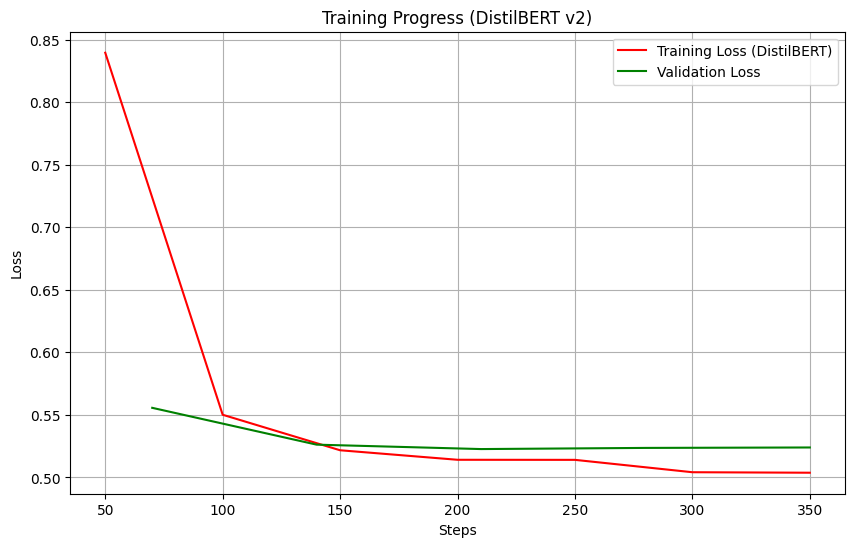

In [19]:
# saving and plotting
import matplotlib.pyplot as plt
import json
import os

output_dir = "./distilbert_output_fine-tuned_v2"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"saving model to {output_dir}...")
db_trainer_v2.save_model(output_dir)
distil_tokenizer.save_pretrained(output_dir)

history = db_trainer_v2.state.log_history
# filtering for loss values to plot
train_loss = [x['loss'] for x in history if 'loss' in x]
steps = [x['step'] for x in history if 'loss' in x]

if train_loss:
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_loss, label="Training Loss (DistilBERT)", color="Red")
    
    # checking for validation loss
    val_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]
    val_steps = [x['step'] for x in history if 'eval_loss' in x]
    
    if val_loss:
        plt.plot(val_steps, val_loss, label="Validation Loss", color="Green")
        
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training Progress (DistilBERT v2)")
    plt.legend()
    plt.grid(True)
    plt.show()

Observations: Label Smoothing had a positive impact on the model's recall, which increased from 81.7 to 82.9. The F1 score also has a slight increase, however the precision dropped. This is because the model is now not as aggressive into predicting a class with high confidence, instead we tell the model to attempt to predict with lower confidence, which makes it more cautious. This is imporant because for Legal documentation, it is critical to not miss any sensitive information.

#### DistilBERT Fine-Tuned v3 (Mit)

In [20]:
from transformers import EarlyStoppingCallback
# initializing the distilbert model
distil_model_v3 = AutoModelForTokenClassification.from_pretrained(
    distil_checkpoint,
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
distil_model_v3.to(device)

# setting hyperparams
db_args_v3 = TrainingArguments(
    "distilbert-ner-v3-output",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=3e-5, # increased learning rate 
    num_train_epochs=5, # increased Epochs to train more
    weight_decay=0.01,  # reduced weight decay to make the model more aggressive, the model does not need very high weights to make a prediction (penalty is reduced)
    logging_steps=50,
    metric_for_best_model="loss",
    seed=42,
    data_seed=42 
)

db_trainer_v3 = Trainer(
    model=distil_model_v3,
    args=db_args_v3,
    train_dataset=distil_tokenized["train"],
    eval_dataset=distil_tokenized["validation"],
    data_collator=DataCollatorForTokenClassification(distil_tokenizer),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("starting distilbert v3 training...")
db_trainer_v3.train()
metrics_db_v3 = evaluate_model_performance(db_trainer_v3, distil_tokenized["test"], model_name="DistilBERT_v3")
print("\n final results (DistilBERT):")
display(pd.DataFrame([metrics_db]).round(4))

Loading weights: 100%|██████████| 100/100 [00:00<00:00, 677.74it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForTokenClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
classifier.weight       | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


starting distilbert v3 training...


Epoch,Training Loss,Validation Loss
1,0.497990,0.138706
2,0.128608,0.101452
3,0.086107,0.098404
4,0.084529,0.105449
5,0.069774,0.104834


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
There were missing keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias'].
There were unexpected keys in the checkpoint model loaded: ['distilbert.embeddings.LayerNorm.beta', 'distilbert.embeddings.LayerNorm.gamma'].


--- evaluating DistilBERT_v3 ---



 final results (DistilBERT):


,Model,F1 Score,Recall,Precision,Accuracy
0,DistilBERT_v2,0.806,0.8295,0.7839,0.9605


In [22]:
print("\n final results (DistilBERT):")
display(pd.DataFrame([metrics_db_v3]).round(4))


 final results (DistilBERT):


,Model,F1 Score,Recall,Precision,Accuracy
0,DistilBERT_v3,0.8071,0.8384,0.778,0.9626


saving model to ./distilbert_output_fine-tuned_v3...


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


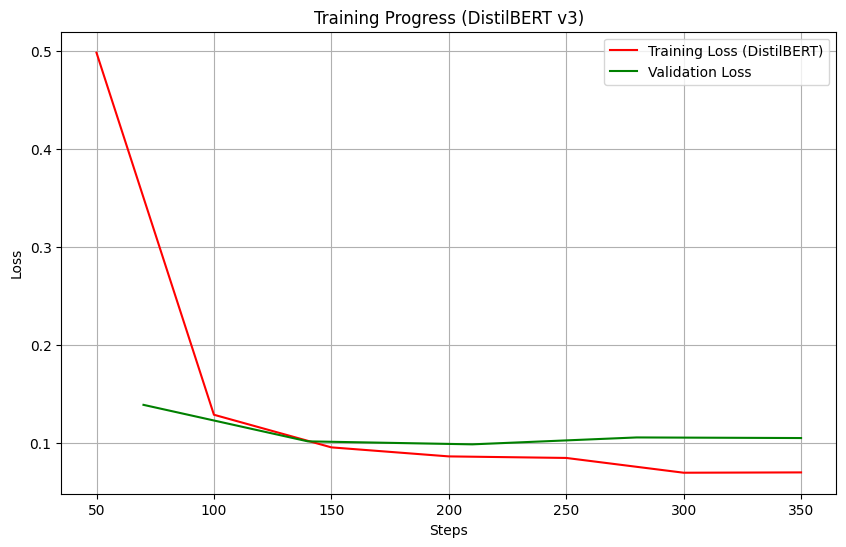

In [21]:
# saving and plotting
import matplotlib.pyplot as plt
import json
import os

output_dir = "./distilbert_output_fine-tuned_v3"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"saving model to {output_dir}...")
db_trainer_v3.save_model(output_dir)
distil_tokenizer.save_pretrained(output_dir)

history = db_trainer_v3.state.log_history
# filtering for loss values to plot
train_loss = [x['loss'] for x in history if 'loss' in x]
steps = [x['step'] for x in history if 'loss' in x]

if train_loss:
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_loss, label="Training Loss (DistilBERT)", color="Red")
    
    # checking for validation loss
    val_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]
    val_steps = [x['step'] for x in history if 'eval_loss' in x]
    
    if val_loss:
        plt.plot(val_steps, val_loss, label="Validation Loss", color="Green")
        
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training Progress (DistilBERT v3)")
    plt.legend()
    plt.grid(True)
    plt.show()

Observations: 

### 8. ALBERT finetuning (Sayeed)

In [ ]:
# ALBERT Finetuning (Sayeed)

In [ ]:
# using the shared dataframes (df_train etc) loaded at the top of the notebook
# converting them to hf dataset format and applying the alignment fix
print("prepping data for ALBERT...")
'''This is the same tokenization and alignment function we used for legal-bert, but with the ALBERT tokenizer instead.
The logic is the same: we use offset mapping to align the character-level entity mentions with the token-level inputs that ALBERT sees. 
This ensures that the labels are correctly assigned to the tokens.
The only difference is that we are using the ALBERT tokenizer instead of the legal-bert tokenizer, but the underlying logic remains the same.
'''
tokenizer_albert = AutoTokenizer.from_pretrained("albert-base-v2", use_fast=True)
tokenized_datasets = raw_datasets.map(
    partial(tokenize_and_align_labels, tokenizer=tokenizer_albert),
    batched=True,
    remove_columns=raw_datasets["train"].column_names
)
print("done. tokens aligned.")


prepping data for ALBERT...


Map: 100%|██████████| 555/555 [00:00<00:00, 579.72 examples/s]

done. tokens aligned.


In [ ]:
import torch
'''This is a simple sanity check function to ensure that our model can perform a forward pass without errors.
It takes a few samples from the dataset, converts them to tensors, and passes them through the model to check if the loss can be calculated correctly.
This is important to catch any issues with the data preprocessing, tokenization, or model architecture before training begins.
'''
def sanity_forward_pass(model, dataset, n=2):
    model = model.to("cpu")
    model.train()

    batch = {
        "input_ids": torch.tensor([dataset[i]["input_ids"] for i in range(n)], device="cpu"),
        "attention_mask": torch.tensor([dataset[i]["attention_mask"] for i in range(n)], device="cpu"),
        "labels": torch.tensor([dataset[i]["labels"] for i in range(n)], device="cpu"),
    }

    out = model(**batch)
    print("Forward OK. Loss:", float(out.loss))

sanity_forward_pass(model, tokenized_datasets["train"], n=2)


Forward OK. Loss: 2.0854053497314453


/tmp/ipykernel_9036/1652176267.py:14: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print("Forward OK. Loss:", float(out.loss))


In [ ]:
import os
'''
Imports key Hugging Face Transformers utilities for token classification:
- AutoModelForTokenClassification: pretrained models for token-level tagging.
- TrainingArguments: configuration for training/evaluation.
- Trainer: high-level training loop API.
- DataCollatorForTokenClassification: dynamic padding and label alignment.
- EarlyStoppingCallback: halts training when metrics stop improving.
'''
from transformers import (
    AutoModelForTokenClassification,
    TrainingArguments,
    Trainer,
    DataCollatorForTokenClassification,
    EarlyStoppingCallback
)

"""
Initializes an ALBERT token-classification model for NER using the pretrained
`albert-base-v2` checkpoint and configures label mappings for the dataset.

Args:
    num_labels (int): Number of NER labels.
    id2label (dict): Mapping from label IDs to label strings.
    label2id (dict): Mapping from label strings to label IDs.

Returns:
    transformers.AutoModelForTokenClassification: Configured ALBERT model.
"""
model = AutoModelForTokenClassification.from_pretrained(
    "albert-base-v2",                  
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
)

"""
TrainingArguments for ALBERT NER fine-tuning.

Args:
    output_dir (str): Directory to save model checkpoints and outputs.
    eval_strategy (str): Evaluation frequency (e.g., "epoch").
    save_strategy (str): Checkpoint saving frequency (e.g., "epoch").
    load_best_model_at_end (bool): Whether to load the best model at the end of training.
    metric_for_best_model (str): Metric to use for selecting the best model (e.g., "eval_loss").
    greater_is_better (bool): Whether a higher metric value is better (False for loss).
    learning_rate (float): Learning rate for optimizer.
    warmup_ratio (float): Fraction of total steps for learning rate warmup.
    per_device_train_batch_size (int): Batch size per device during training.
    per_device_eval_batch_size (int): Batch size per device during evaluation.
    num_train_epochs (int): Total number of training epochs.
    weight_decay (float): Weight decay for optimizer.
    logging_strategy (str): Logging frequency (e.g., "steps").
    logging_steps (int): Number of steps between logging.
    save_total_limit (int): Maximum number of checkpoints to keep.
    report_to (str): Reporting integration (e.g., "none" for no reporting).

This configuration enables checkpointing, early stopping, and best model selection for robust ALBERT NER training.
"""
args = TrainingArguments(
    output_dir="albert-ner",
    eval_strategy="epoch",
    save_strategy="epoch",             # must save checkpoints for early stopping / best model
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss", 
    greater_is_better=False,

    learning_rate=2e-5,
    warmup_ratio=0.1,                 
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,               # allow early stopping to stop early
    weight_decay=0.01,

    logging_strategy="steps",
    logging_steps=50,
    
    save_total_limit=2,
    report_to="none"
)

"""
Initializes a Hugging Face Trainer for fine-tuning a token classification model (e.g., ALBERT) on a NER task.

Args:
    model (PreTrainedModel): The model to train (e.g., ALBERT for token classification).
    args (TrainingArguments): Training configuration, including hyperparameters, output directory, etc.
    train_dataset (Dataset): The tokenized training dataset.
    eval_dataset (Dataset): The tokenized validation dataset for evaluation during training.
    data_collator (DataCollatorForTokenClassification): Handles dynamic padding and batching for token classification.
    callbacks (list): List of TrainerCallback objects, e.g., EarlyStoppingCallback for early stopping based on validation loss.

Returns:
    Trainer: A configured Trainer object ready for training and evaluation.
"""
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=DataCollatorForTokenClassification(tokenizer_albert),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

"""
Trains the ALBERT model using the Hugging Face Trainer, saves the best checkpoint, and evaluates the model on the test set.

Workflow:
1. Starts the training process and prints progress.
2. Prints the path to the best model checkpoint found during training.
3. Saves the best model and tokenizer to a specified directory.
4. Evaluates the trained model on the test dataset using the provided evaluation function.
5. Displays the evaluation metrics in a formatted DataFrame.

Args:
    trainer (Trainer): Hugging Face Trainer object configured for ALBERT fine-tuning.
    args (TrainingArguments): Training arguments containing output directory information.
    tokenizer_albert (PreTrainedTokenizer): Tokenizer used for ALBERT.
    tokenized_datasets (DatasetDict): Tokenized Hugging Face datasets with train/validation/test splits.
    evaluate_model_performance (function): Function to compute evaluation metrics.
    pd (module): pandas module for displaying results.

Returns:
    None. Prints training progress, saves the best model, and displays evaluation metrics.
"""
print("starting training...")
trainer.train()

print("Best checkpoint:", trainer.state.best_model_checkpoint)


best_dir = os.path.join(args.output_dir, "best_model")
trainer.save_model(best_dir)
tokenizer_albert.save_pretrained(best_dir)
print("Saved best model to:", best_dir)


metrics_albert = evaluate_model_performance(
    trainer,
    tokenized_datasets["test"],
    model_name="ALBERT (Fine-tuned)"
)

print("\nfinal results:")
display(pd.DataFrame([metrics_albert]).round(4))


Loading weights: 100%|██████████| 23/23 [00:00<00:00, 630.37it/s, Materializing param=albert.encoder.embedding_hidden_mapping_in.weight]                                
AlbertForTokenClassification LOAD REPORT from: albert-base-v2
Key                          | Status     | 
-----------------------------+------------+-
predictions.LayerNorm.bias   | UNEXPECTED | 
predictions.dense.weight     | UNEXPECTED | 
predictions.decoder.bias     | UNEXPECTED | 
predictions.dense.bias       | UNEXPECTED | 
albert.pooler.bias           | UNEXPECTED | 
predictions.bias             | UNEXPECTED | 
albert.pooler.weight         | UNEXPECTED | 
predictions.LayerNorm.weight | UNEXPECTED | 
classifier.bias              | MISSING    | 
classifier.weight            | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on you

starting training...


Epoch,Training Loss,Validation Loss
1,0.950470,0.134053
2,0.125220,0.092737
3,0.080617,0.091702
4,0.080936,0.097672
5,0.062784,0.095690


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]
There were missing keys in the checkpoint model loaded: ['albert.embeddings.LayerNorm.weight', 'albert.embeddings.LayerNorm.bias', 'albert.encoder.albert_layer_groups.0.albert_layers.0.attention.LayerNorm.weight', 'albert.encoder.albert_layer_groups.0.albert_layers.0.attention.LayerNorm.bias'].
There were unexpected keys in the checkpoint model loaded: ['albert.embeddings.LayerNorm.beta', 'albert.embeddings.LayerNorm.gamma', 'albert.encoder.albert_layer_groups.0.albert_layers.0.attention.LayerNorm.beta', 'albert.encoder.albert_layer_groups.0.albert_layers.0.attention.LayerNorm.gamma'].


Best checkpoint: albert-ner/checkpoint-210


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


Saved best model to: albert-ner/best_model


NameError: name 'evaluate_model_performance' is not defined

In [ ]:
import numpy as np

def evaluate_model_performance(trainer, eval_dataset, label_list, metric, model_name="MyModel"):
    """
    Evaluates a token classification model (e.g., NER) using a Hugging Face Trainer.

    Args:
        trainer (Trainer): Hugging Face Trainer object with the trained model.
        eval_dataset (Dataset): Tokenized evaluation dataset.
        label_list (list): List mapping label IDs to label names.
        metric (evaluate.EvaluationModule): Metric object (e.g., seqeval) for computing NER scores.
        model_name (str, optional): Name of the model for reporting. Defaults to "MyModel".

    Returns:
        dict: Dictionary containing model name, F1 score, recall, precision, and accuracy.
    """
    print(f"--- evaluating {model_name} ---")

    predictions, labels, _ = trainer.predict(eval_dataset)
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)

    return {
        "Model": model_name,
        "F1 Score": results["overall_f1"],
        "Recall": results["overall_recall"],
        "Precision": results["overall_precision"],
        "Accuracy": results["overall_accuracy"],
    }


In [ ]:
"""
Evaluates the fine-tuned ALBERT model on the test dataset using the provided evaluation function.

Args:
    trainer (Trainer): Hugging Face Trainer object with the trained ALBERT model.
    eval_dataset (Dataset): Tokenized Hugging Face test dataset.
    label_list (list): List of label names corresponding to label IDs.
    metric (evaluate.EvaluationModule): Metric object (e.g., seqeval) for NER evaluation.
    model_name (str): Name to display for the evaluated model.

Returns:
    metrics_albert (dict): Dictionary containing evaluation metrics (F1 Score, Recall, Precision, Accuracy) for the ALBERT model.

Displays:
    A pandas DataFrame with the evaluation metrics, rounded to 4 decimal places.
"""

metrics_albert = evaluate_model_performance(
    trainer=trainer,
    eval_dataset=tokenized_datasets["test"],
    label_list=label_list,
    metric=metric,
    model_name="ALBERT (Fine-tuned)"
)

print("\nfinal results:")
display(pd.DataFrame([metrics_albert]).round(4))

--- evaluating ALBERT (Fine-tuned) ---



final results:


,Model,F1 Score,Recall,Precision,Accuracy
0,ALBERT (Fine-tuned),0.8161,0.8481,0.7865,0.9643


In [ ]:
import os, json
import matplotlib.pyplot as plt

def export_best_and_plot(trainer, tokenizer, output_dir="albert-ner", export_dirname="best_model", title="Training Progress"):
    """
    Saves the best model and tokenizer from a Hugging Face Trainer to the specified output directory,
    exports the training history to a JSON file, and plots the training and validation loss curves.

    Args:
        trainer (transformers.Trainer): The Hugging Face Trainer object after training.
        tokenizer (transformers.PreTrainedTokenizer): The tokenizer used for the model.
        output_dir (str): Directory path where the model, tokenizer, and plots will be saved.
        plot_title (str, optional): Title for the loss plot. Defaults to "Training Progress".

    Side Effects:
        - Saves the trained model and tokenizer to `output_dir`.
        - Exports the training history as a JSON file to `output_dir/training_history.json`.
        - Saves a PNG plot of training and validation loss to `output_dir/training_graph.png`.
        - Displays the loss plot inline if running in a Jupyter notebook.

    Returns:
        None
    """
    # 1) Export best model to a clean folder
    best_export_dir = os.path.join(output_dir, export_dirname)
    os.makedirs(best_export_dir, exist_ok=True)

    # Trainer usually loads best model at end if load_best_model_at_end=True
    trainer.save_model(best_export_dir)
    tokenizer.save_pretrained(best_export_dir)
    print("Exported best model to:", best_export_dir)

    # 2) Save training history
    history = trainer.state.log_history
    history_path = os.path.join(output_dir, "training_history.json")
    with open(history_path, "w", encoding="utf-8") as f:
        json.dump(history, f, indent=2)
    print("Saved history to:", history_path)

    # 3) Plot train/val loss (epoch if available else step)
    use_epoch = any("epoch" in x for x in history)
    x_key = "epoch" if use_epoch else "step"

    train_x = [x[x_key] for x in history if "loss" in x and x_key in x]
    train_loss = [x["loss"] for x in history if "loss" in x and x_key in x]

    val_x = [x[x_key] for x in history if "eval_loss" in x and x_key in x]
    val_loss = [x["eval_loss"] for x in history if "eval_loss" in x and x_key in x]

    if not train_loss and not val_loss:
        print("Not enough history to plot. Enable logging/eval strategies.")
        return

    plt.figure(figsize=(10, 6))
    if train_loss:
        plt.plot(train_x, train_loss, label="Training Loss")
    if val_loss:
        plt.plot(val_x, val_loss, label="Validation Loss")

    plt.xlabel("Epoch" if use_epoch else "Steps")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)

    graph_path = os.path.join(output_dir, "training_graph.png")
    plt.savefig(graph_path, dpi=200, bbox_inches="tight")
    print("Saved graph to:", graph_path)
    plt.show()

    return best_export_dir, history_path, graph_path


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


Exported best model to: albert-ner/best_model
Saved history to: albert-ner/training_history.json
Saved graph to: albert-ner/training_graph.png


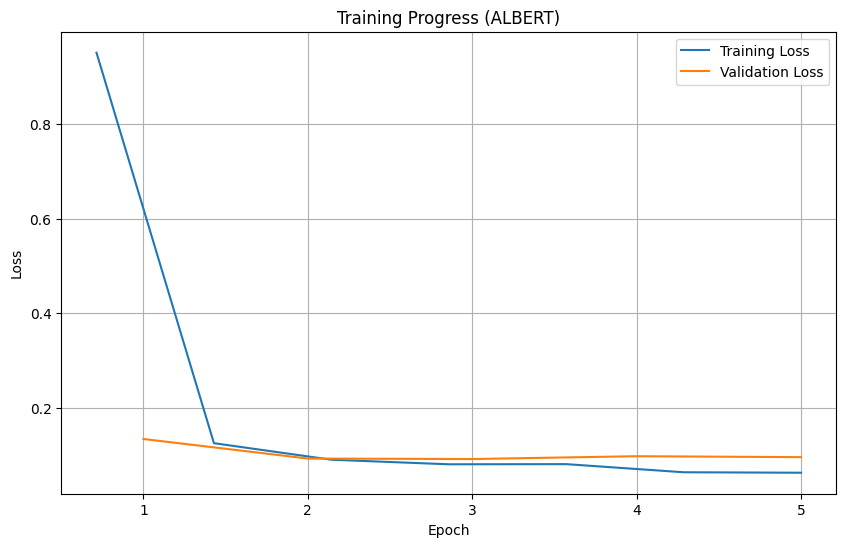

('albert-ner/best_model',
 'albert-ner/training_history.json',
 'albert-ner/training_graph.png')

In [ ]:
"""
Saves the best ALBERT model and tokenizer, exports the training history, and plots training/validation loss.

Args:
    trainer (transformers.Trainer): The Hugging Face Trainer object after ALBERT fine-tuning.
    tokenizer (transformers.PreTrainedTokenizer): The ALBERT tokenizer used for preprocessing.
    output_dir (str): Directory to save the model, tokenizer, training history, and plots.
    export_dirname (str): Subdirectory name within output_dir for saving the best model and tokenizer.
    title (str): Title for the training loss plot.

Side Effects:
    - Saves the best model and tokenizer to output_dir/export_dirname.
    - Exports the training log history as a JSON file to output_dir/training_history.json.
    - Plots and saves the training/validation loss curve as output_dir/training_graph.png.

Returns:
    tuple: (best_export_dir, history_path, graph_path)
        - best_export_dir (str): Path to the exported best model directory.
        - history_path (str): Path to the saved training history JSON file.
        - graph_path (str): Path to the saved training/validation loss plot.
"""

export_best_and_plot(
    trainer=trainer,
    tokenizer=tokenizer_albert,
    output_dir="albert-ner",
    export_dirname="best_model",
    title="Training Progress (ALBERT)"
)


### Lessons Learned from EDA and ALBERT Model Development 

- **CUDA Poisoning & Platform Limitations:**  
    While working with GPU-accelerated training, I encountered "CUDA poisoning", a situation where the CUDA context becomes corrupted, often due to out-of-memory errors or improper kernel shutdowns. 
    This required frequent kernel restarts and highlighted the fragility of GPU sessions, especially on shared or limited-resource platforms like Google Colab and Kaggle. 
    These platforms, while convenient, impose restrictions on session duration, available memory, and GPU access, which can interrupt long-running experiments and complicate reproducibility.

- **Version Control & Collaboration with GitHub:**  
    Using GitHub was essential for managing code versions and collaborating with teammates. 
    It helped in tracking changes, resolving merge conflicts, and ensuring that the codebase remained clean and organized. 
    Branching strategies and pull requests facilitated parallel development and made it easier to review and integrate contributions without overwriting other members contributions.

- **General EDA and Model Insights:**  
    Exploratory Data Analysis (EDA) was crucial for understanding the dataset's structure, class imbalance, and potential data quality issues. 
    This informed preprocessing decisions and model design. 
    Fine-tuning the ALBERT model for NER tasks required careful attention to token-label alignment and highlighted the importance of robust data pipelines.

Overall, these experiences underscored the importance of robust infrastructure, effective version control, and thorough data understanding in Deep learning projects.

#### -Sayeed.